# How can frog grow its tail back?


## Data accession

Load data from the link directly or load it through Courseworks .zip file.

In [1]:
!wget https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip -O /content/frogtail.zip

--2025-02-21 03:09:47--  https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94419121 (90M) [application/zip]
Saving to: ‘/content/frogtail.zip’

/content/frogtail.z 100%[===================>]  90.04M  20.3MB/s    in 6.0s    

2025-02-21 03:09:55 (14.9 MB/s) - ‘/content/frogtail.zip’ saved [94419121/94419121]



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os

zip_file = "/content/frogtail.zip" # replace path to your zip file's path
extract_dir = "/content/drive/MyDrive/Project 1/Frogtail_files/" # where zip file is going to be extracted to

os.makedirs(extract_dir, exist_ok=True) # create the extraction directory if it doesn't exist

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/Project 1/Frogtail_files/


In [4]:
zip_file = extract_dir+"ArrayExpressV2.zip" # file is a nested zip, dezip again

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/Project 1/Frogtail_files/


## Make an anndata matrix using scanpy or anndata

Usually single cell data is either directly stored in highdimensional files with .h5 extensions or in compressed count matrices with several tsv/csv/json logging the covariates information. Here is an example of how to compress and download this data into an anndata object that facilitates downstream single cell analysis.

- AnnData object for single cell data:  [Documentation](https://https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
- Scanpy for single cell analysis: [Documentation](https://scanpy.readthedocs.io/en/stable/index.html)



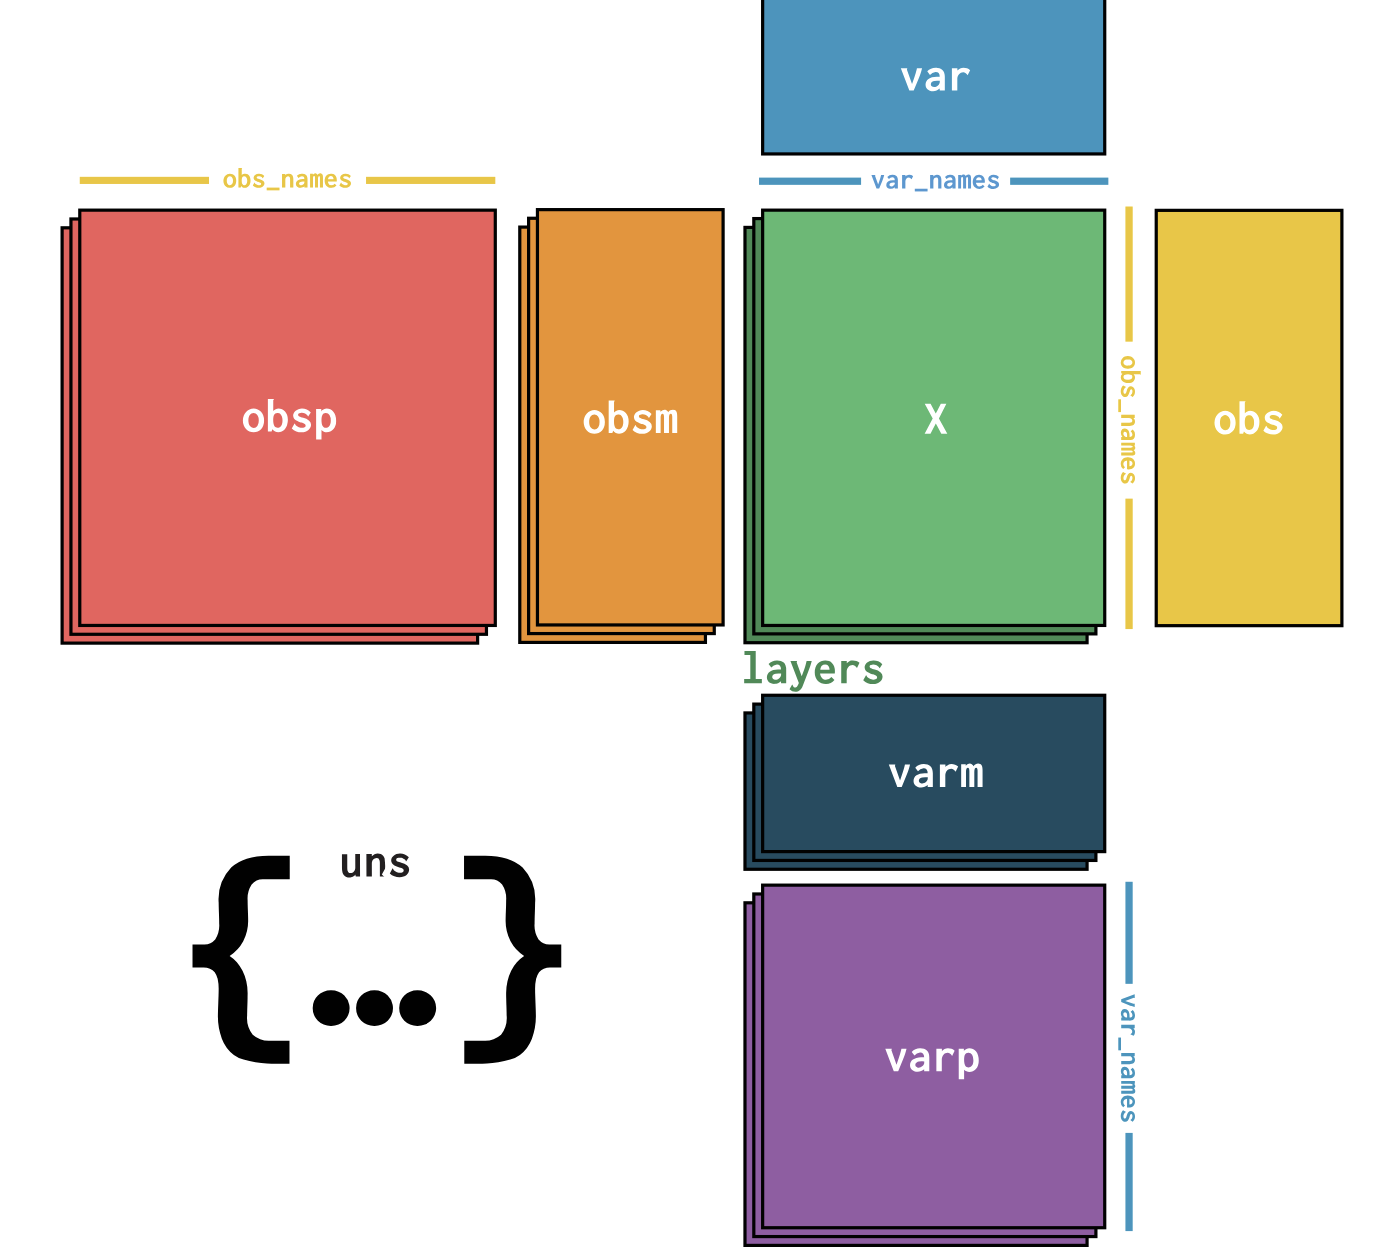

In [5]:
!pip install anndata
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
#!pip install --upgrade --no-cache-dir numpy==1.24.4


In [7]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread


X = mmread(extract_dir+'ArrayExpress/countsMatrix.mtx') # compressed sparse matrix of gene expression
genes = pd.read_csv(extract_dir+'ArrayExpress/genes.csv', sep=' ', header=None) # col names of genes
cells = pd.read_csv(extract_dir+'ArrayExpress/cells.csv', sep=' ', header=None) # row names of cells
labels = pd.read_csv(extract_dir+'ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir+'ArrayExpress/meta.csv')


adata = ad.AnnData(X.T)

/usr/local/lib/python3.11/dist-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


In [8]:
cells.columns = ['barcode_cells']
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

In [9]:
adata.var_names = genes[0]
adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell')


In [10]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [11]:
adata.var

Empty DataFrame
Columns: []
Index: [Xelaev18000001m.g, Xelaev18000003m.g, Xelaev18000004m.g, Xelaev18000005m.g, tm6sf2.1, Xelaev18000007m.g, bpi.S, Xelaev18000010m.g, Xelaev18000011m.g, Xelaev18000015m.g, arhgap28.S, tmem200c.S, Xelaev18000024m.g, Xelaev18000025m.g, Xelaev18000026m.g, bcap31.L, Xelaev18000028m.g, plxnb3.L, loc100493711.L, wnt7c.L, hsd17b10.L, syp.L, gpkow.L, plp2.L, prickle3.like.L, klhl7.S, igf2bp3.S, Xelaev18000040m.g, Xelaev18000041m.g, tra2a.S, Xelaev18000045m.g, Xelaev18000047m.g, Xelaev18000048m.g, loc100491805.1.L, pga4.L, tmem132a.L, prpf19.L, Xelaev18000056m.g, Xelaev18000057m.g, hinfp.S, abcg4.S, pdzd3.S, cbl.S, mcam.S, Xelaev18000066m.g, Xelaev18000067m.g, Xelaev18000069m.g, Xelaev18000071m.g, Xelaev18000072m.g, loc443731, Xetrov90024636m.1, Xelaev18000089m.g, gkap1.L, mrps18c.1.L, loc100492437.L, MGC147600.1.L, Xelaev18000095m.g, Xelaev18000097m.g, Xelaev18000100m.g, taar1.L, Xelaev18000104m.g, Xelaev18000107m.g, Xelaev18000109m.g, Xelaev18000110m.g, srsf10.L, loc100145027.L, myom3.L, il22ra1.L, ifnlr1.L, Xelaev18000117m.g, Xelaev18000119m.g, gab1.L, smarca5.L, frem2.1.L, Xelaev18000125m.g, Xelaev18000127m.g, Xelaev18000128m.g, taf10, Xelaev18000132m.g, Xetrov90002011m.L, ppp1r3b.L, Xelaev18000135m.g, eri1.L, ubap2.L, dcaf12.L, ube2r2.L, loc101733340.1.L, Xelaev18000150m.g, Xelaev18000152m.g, loc101734519.1.L, Xelaev18000156m.g, Xelaev18000158m.g, Xelaev18000159m.g, Xelaev18000160m.g, Xelaev18000166m.g, Xelaev18000173m.g, irx5.1.L, Xelaev18000175m.g, Xetrov90000066m.1, cep295.S, ...]

[31535 rows x 0 columns]

In [12]:
adata.X = adata.X.tocsr()

In [13]:
adata.write_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad')

## Load data

In [14]:
import anndata as ad
extract_dir = "/content/drive/MyDrive/Project 1/Frogtail_files/"
adata = ad.read_h5ad('/content/drive/MyDrive/Project 1/Frogtail_files/cleaned_processed_frogtail.h5ad') # ad.read_h5ad()

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [15]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [16]:
adata.obs

barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st40   
13196    TTGCGTCTCAAGAAGT.1    TTGCGTCTCAAGAAGT.1  SIGAB10               st40   
13197    TTGTAGGCAGTACACT.1    TTGTAGGCAGTACACT.1  SIGAB10               st40   
13198  TTTGCGCAGCGTGAAC.1.1  TTTGCGCAGCGTGAAC.1.1  SIGAB10               st40   

       DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                       3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                       3      Myeloid 1 -2.428271  13.826715             G1   
2                       3  Beta ionocyte -1.398049 -14.653897             G1   
3                       3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                       3    Goblet cell  2.106444  -6.594430             G1   
...                   ...            ...       ...        ...            ...   
13194                   3  Erythrocyte 4 -5.879582   0.924197            G2M   
13195                   3    Goblet cell  1.252149  -8.870151             G1   
13196                   3    Goblet cell  0.693335  -9.168521             G1   
13197                   3  Erythrocyte 1 -4.087618   4.145738             G1   
13198                   3    Goblet cell  0.803595  -7.395422             G1   

        Sample       Lane Condition  batch  
0       SIGAB5  SLX-15583    ST40_3      3  
1       SIGAB5  SLX-15583    ST40_3      3  
2       SIGAB5  SLX-15583    ST40_3      3  
3       SIGAB5  SLX-15583    ST40_3      3  
4       SIGAB5  SLX-15583    ST40_3      3  
...        ...        ...       ...    ...  
13194  SIGAB10  SLX-15739    ST40_3      4  
13195  SIGAB10  SLX-15739    ST40_3      4  
13196  SIGAB10  SLX-15739    ST40_3      4  
13197  SIGAB10  SLX-15739    ST40_3      4  
13198  SIGAB10  SLX-15739    ST40_3      4  

[13199 rows x 13 columns]

In [17]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [18]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [19]:
adata.obs

barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st40   
13196    TTGCGTCTCAAGAAGT.1    TTGCGTCTCAAGAAGT.1  SIGAB10               st40   
13197    TTGTAGGCAGTACACT.1    TTGTAGGCAGTACACT.1  SIGAB10               st40   
13198  TTTGCGCAGCGTGAAC.1.1  TTTGCGCAGCGTGAAC.1.1  SIGAB10               st40   

       DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                       3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                       3      Myeloid 1 -2.428271  13.826715             G1   
2                       3  Beta ionocyte -1.398049 -14.653897             G1   
3                       3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                       3    Goblet cell  2.106444  -6.594430             G1   
...                   ...            ...       ...        ...            ...   
13194                   3  Erythrocyte 4 -5.879582   0.924197            G2M   
13195                   3    Goblet cell  1.252149  -8.870151             G1   
13196                   3    Goblet cell  0.693335  -9.168521             G1   
13197                   3  Erythrocyte 1 -4.087618   4.145738             G1   
13198                   3    Goblet cell  0.803595  -7.395422             G1   

        Sample       Lane Condition  batch  
0       SIGAB5  SLX-15583    ST40_3      3  
1       SIGAB5  SLX-15583    ST40_3      3  
2       SIGAB5  SLX-15583    ST40_3      3  
3       SIGAB5  SLX-15583    ST40_3      3  
4       SIGAB5  SLX-15583    ST40_3      3  
...        ...        ...       ...    ...  
13194  SIGAB10  SLX-15739    ST40_3      4  
13195  SIGAB10  SLX-15739    ST40_3      4  
13196  SIGAB10  SLX-15739    ST40_3      4  
13197  SIGAB10  SLX-15739    ST40_3      4  
13198  SIGAB10  SLX-15739    ST40_3      4  

[13199 rows x 13 columns]

## Processing data

In [20]:
adata.layers["counts"] = adata.X.copy()


In [21]:
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [22]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

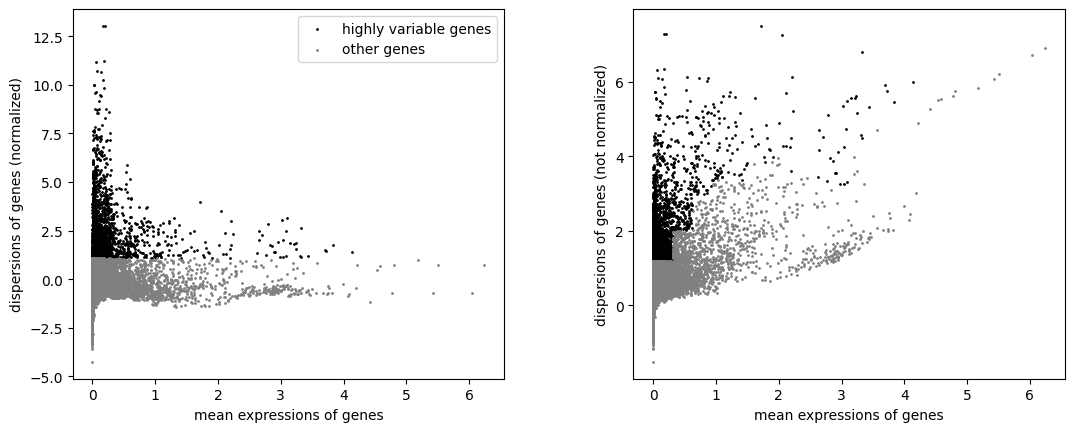

In [23]:
sc.pl.highly_variable_genes(adata)

## Check Developmental Stage


In [24]:
import scanpy as sc

adata = sc.read_h5ad('/content/drive/MyDrive/Project 1/Frogtail_files/cleaned_processed_frogtail.h5ad') # ad.read_h5ad()

unique_stages = adata.obs["DevelopmentalStage"].unique()
print("Available Developmental Stages:", unique_stages)

Available Developmental Stages: ['st40', 'st46']
Categories (2, object): ['st40', 'st46']


/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [25]:
adata_st40 = adata[adata.obs["DevelopmentalStage"] == "st40"].copy()
print(f"Number of cells in earliest post-amputation stage (st40): {adata_st40.n_obs}")
adata_st40.write("filtered_data_st40.h5ad")

Number of cells in earliest post-amputation stage (st40): 7868


## Quality Control & Normalization

In [26]:
import numpy as np
import scanpy as sc

adata_filtered = adata_st40.copy()

sc.pp.filter_cells(adata_filtered, min_genes=200) #remove cells with < 200 genes
sc.pp.filter_genes(adata_filtered, min_cells=3)  #remove genes expressed in < 3 cells

adata_filtered.var["mt"] = adata_filtered.var_names.str.startswith("MT-")  #mark mitochondrial genes
sc.pp.calculate_qc_metrics(adata_filtered, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

adata_filtered = adata_filtered[adata_filtered.obs["n_genes_by_counts"] < 2500, :]
adata_filtered = adata_filtered[adata_filtered.obs["pct_counts_mt"] < 5, :]

sc.pp.normalize_total(adata_filtered, target_sum=1e4)  #normalize so each cell has total counts = 10,000

sc.pp.log1p(adata_filtered)
adata_filtered.write("processed_data_st40.h5ad")

print(f"Final number of cells: {adata_filtered.n_obs}")
print(f"Final number of genes: {adata_filtered.n_vars}")

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Final number of cells: 4599
Final number of genes: 25546


## Gene Selection

#### Top 10
Most Variable Genes

In [27]:
!pip install --upgrade --no-cache-dir scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 52.9 MB/s eta 0:00:00


In [28]:
import sys
sys.path.append("/root/.local/lib/python3.11/site-packages")

from skmisc.loess import loess  # Try importing again


In [29]:
import skmisc

sc.pp.highly_variable_genes(adata_filtered, flavor="seurat_v3", n_top_genes=10)
variable_genes = adata_filtered.var[adata_filtered.var["highly_variable"]].index.tolist()
print("Top 10 Most Variable Genes:", variable_genes)

/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:74: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Top 10 Most Variable Genes: ['tmsb4x.L', 'hbd.L', 'Xelaev18045083m.g', 'Xelaev18045084m.g', 'Xelaev18045096m.g', 'Xelaev18045098m.g', 'Xelaev18045099m.g', 'hbd.S', 'Xelaev18047455m.g', 'Xelaev18047464m.g']


#### Top 10 Genes with Highest Mean Expression

In [30]:
top_mean_genes = adata_filtered.var["mean_counts"].nlargest(10).index.tolist()
print("Top 10 Genes with Highest Mean Expression:", top_mean_genes)

Top 10 Genes with Highest Mean Expression: ['hbd.S', 'Xelaev18045099m.g', 'Xelaev18045098m.g', 'hbd.L', 'Xelaev18047464m.g', 'Xelaev18045083m.g', 'Xelaev18047455m.g', 'Xelaev18045084m.g', 'Xelaev18045096m.g', 'hbg2.L']


#### Top 10 Most Informative Genes

In [31]:
import skmisc

sc.pp.highly_variable_genes(adata_filtered, flavor="seurat_v3", n_top_genes=10)
top_informative_genes = adata_filtered.var[adata_filtered.var["highly_variable"]].index.tolist()
print("Top 10 Most Informative Genes:", variable_genes)

Top 10 Most Informative Genes: ['tmsb4x.L', 'hbd.L', 'Xelaev18045083m.g', 'Xelaev18045084m.g', 'Xelaev18045096m.g', 'Xelaev18045098m.g', 'Xelaev18045099m.g', 'hbd.S', 'Xelaev18047455m.g', 'Xelaev18047464m.g']


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:74: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


#### 10 Random Genes

In [32]:
import random
random_genes = random.sample(list(adata_filtered.var_names), 10)
print("10 Randomly Selected Genes:", random_genes)

10 Randomly Selected Genes: ['sdcbp.L', 'ppm1k.L', 'pkp3.L', 'tagln2.L', 'cracr2b.S', 'pabpc1.S', 'Xelaev18030346m.g', 'Xelaev18032485m.g', 'Xelaev18029648m.g', 'stil.L']


## Clustering and Visualization

#### K-Means

In [33]:
from sklearn.cluster import KMeans
import numpy as np

gene_sets = {
    "Variable": variable_genes,  #3(a)
    "High Mean": top_mean_genes,  #3(b)
    "Informative": top_informative_genes,  #3(c)
    "Random": random_genes        #3(d)
}

#K-means clustering
clusters = {}
for key, genes in gene_sets.items():
    X_subset = adata_filtered[:, genes].X.toarray()
    kmeans = KMeans(n_clusters=5, random_state=42).fit(X_subset)
    clusters[key] = kmeans.labels_
    print(f"K-Means Clustering for {key}: {np.unique(kmeans.labels_, return_counts=True)}")

K-Means Clustering for Variable: (array([0, 1, 2, 3, 4], dtype=int32), array([ 276, 2069,  924,  904,  426]))
K-Means Clustering for High Mean: (array([0, 1, 2, 3, 4], dtype=int32), array([ 349, 1324, 1024,  746, 1156]))
K-Means Clustering for Informative: (array([0, 1, 2, 3, 4], dtype=int32), array([ 276, 2069,  924,  904,  426]))
K-Means Clustering for Random: (array([0, 1, 2, 3, 4], dtype=int32), array([ 608, 3097,  304,  329,  261]))


#### t-SNE & UMAP

Running t-SNE and UMAP for: Variable genes


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


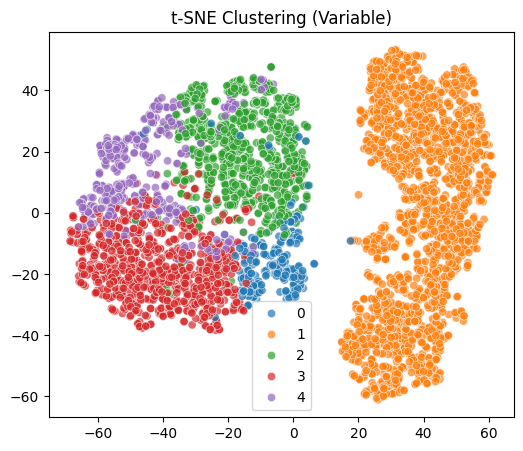

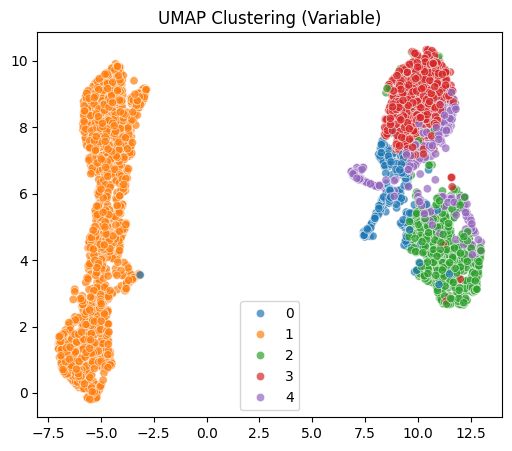

Running t-SNE and UMAP for: High Mean genes


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


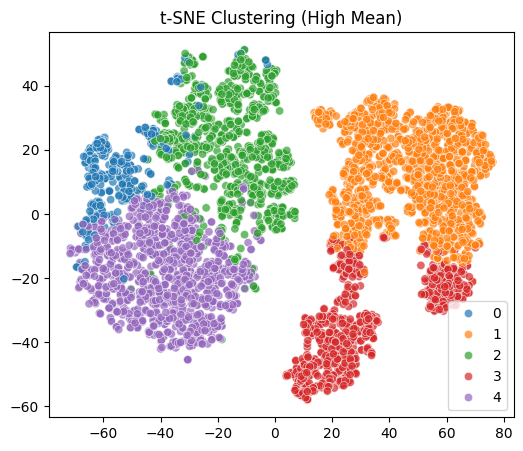

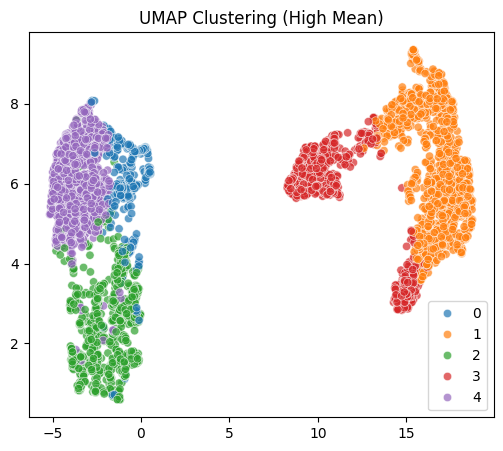

Running t-SNE and UMAP for: Informative genes


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


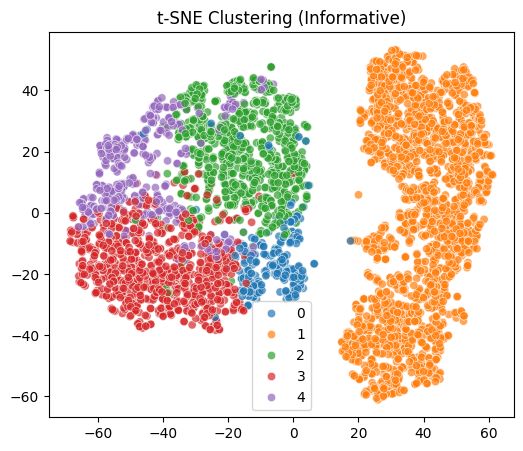

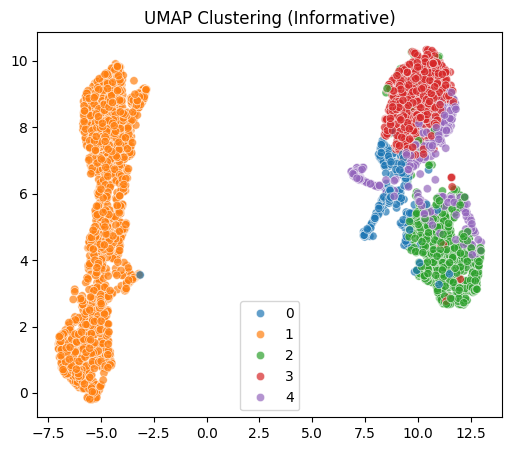

Running t-SNE and UMAP for: Random genes


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


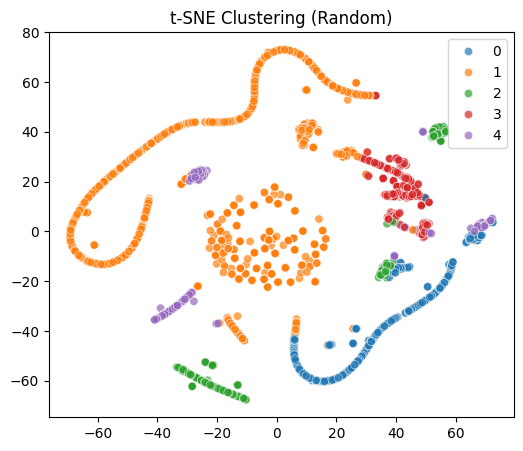

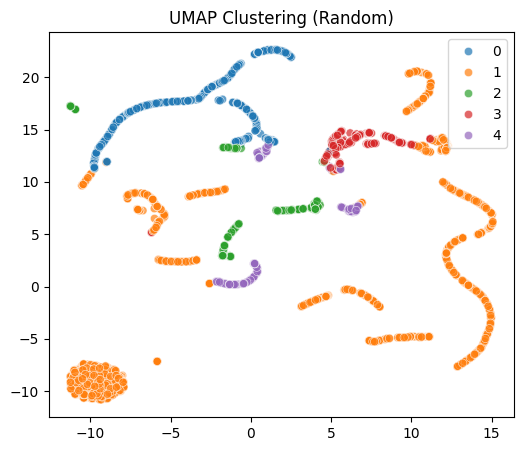

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
import numpy as np

#t-SNE and UMAP function
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=labels, palette="tab10", alpha=0.7)
    plt.title(title)
    plt.show()

for key, genes in gene_sets.items():
    print(f"Running t-SNE and UMAP for: {key} genes")

    X_subset = adata_filtered[:, genes].X.toarray()

    tsne = TSNE(n_components=2, random_state=42).fit_transform(X_subset)
    umap_emb = umap.UMAP(n_components=2, random_state=42).fit_transform(X_subset)

    plot_embedding(tsne, clusters[key], f"t-SNE Clustering ({key})")
    plot_embedding(umap_emb, clusters[key], f"UMAP Clustering ({key})")

In [35]:
import anndata as ad

adata = ad.read_h5ad('/content/drive/MyDrive/Project 1/Frogtail_files/cleaned_processed_frogtail.h5ad')

print(adata)


AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'


/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [36]:
print(adata.obs.head())

print(adata.var.head())

print("Available layers:", adata.layers.keys())


        barcode_cells                cell  sample DevelopmentalStage  \
0  AAACCTGAGCTAGTTC.1  AAACCTGAGCTAGTTC.1  SIGAB5               st40   
1  AAACCTGGTGGGTCAA.1  AAACCTGGTGGGTCAA.1  SIGAB5               st40   
2  AAACCTGGTTTGTTGG.1  AAACCTGGTTTGTTGG.1  SIGAB5               st40   
3  AAACGGGGTCGGCATC.1  AAACGGGGTCGGCATC.1  SIGAB5               st40   
4  AAACGGGTCCTACAGA.1  AAACGGGTCCTACAGA.1  SIGAB5               st40   

   DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                   3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                   3      Myeloid 1 -2.428271  13.826715             G1   
2                   3  Beta ionocyte -1.398049 -14.653897             G1   
3                   3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                   3    Goblet cell  2.106444  -6.594430             G1   

   Sample       Lane Condition  batch  
0  SIGAB5  SLX-15583    ST40_3      3  
1  SIGAB5  SLX-15583    ST40_3

In [37]:
print("X matrix type:", type(adata.X))

print(adata.X[:5, :5])


X matrix type: <class 'scipy.sparse._csr.csr_matrix'>



### Subset

In [38]:
import scanpy as sc

time_point = "st40"
adata_filtered = adata[adata.obs["DevelopmentalStage"] == time_point].copy()

sc.pp.highly_variable_genes(adata_filtered, flavor="seurat_v3", n_top_genes=2000)

adata_filtered = adata_filtered[:, adata_filtered.var["highly_variable"]]

sc.pp.log1p(adata_filtered)

print(f"Filtered dataset shape: {adata_filtered.shape} (cells x genes)")

Filtered dataset shape: (7868, 2000) (cells x genes)


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_simple.py:408: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


### PCA without scaling

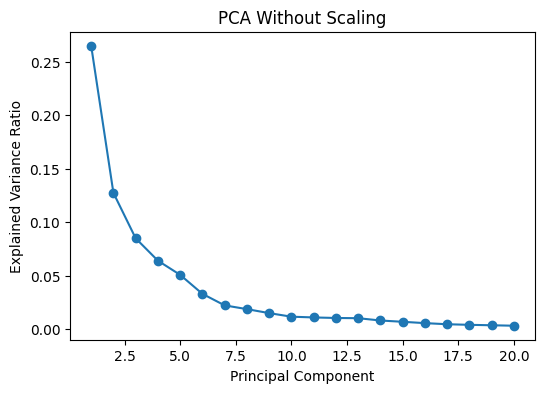

In [39]:
import matplotlib.pyplot as plt

sc.tl.pca(adata_filtered, svd_solver='arpack')

plt.figure(figsize=(6,4))
plt.plot(range(1, 21), adata_filtered.uns["pca"]["variance_ratio"][:20], marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Without Scaling")
plt.show()

### PCA After Scaling

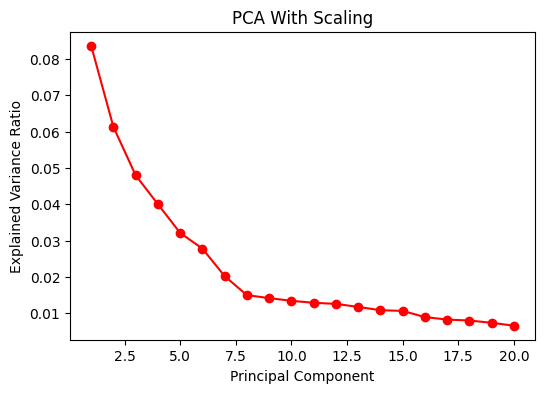

In [40]:
sc.pp.scale(adata_filtered)

sc.tl.pca(adata_filtered, svd_solver='arpack')

plt.figure(figsize=(6,4))
plt.plot(range(1, 21), adata_filtered.uns["pca"]["variance_ratio"][:20], marker="o", color="red")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA With Scaling")
plt.show()


### Leiden Clustering & Plot PCA Clusters & Compare to Paper's Labels

In [41]:
!pip3 install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.0 MB/s eta 0:00:00


In [42]:
!pip3 install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.8 MB/s eta 0:00:00


In [43]:
sc.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=30)

sc.tl.leiden(adata_filtered, resolution=0.5)

adata_filtered.obs["Leiden_Cluster"] = adata_filtered.obs["leiden"]


<ipython-input-43-f4fd92153ec8>:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_filtered, resolution=0.5)


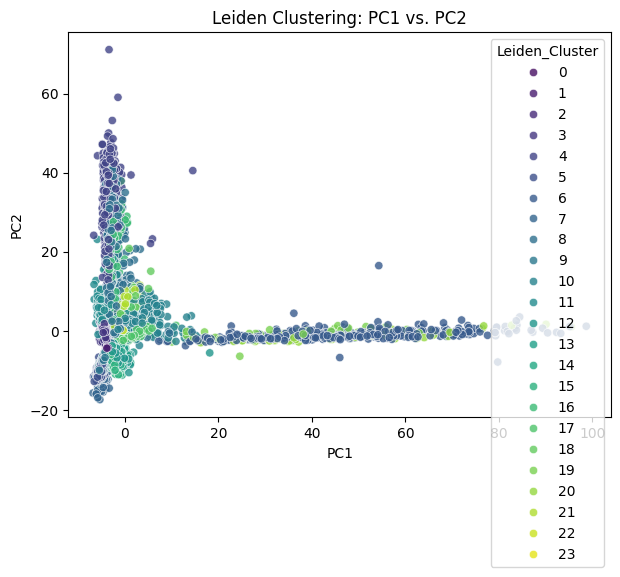

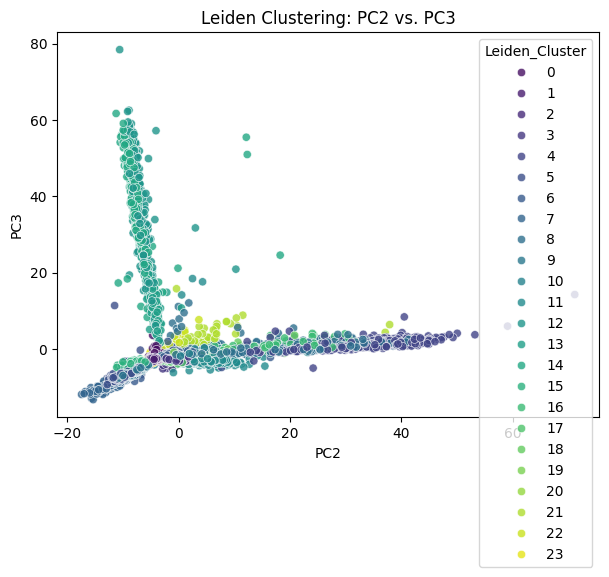

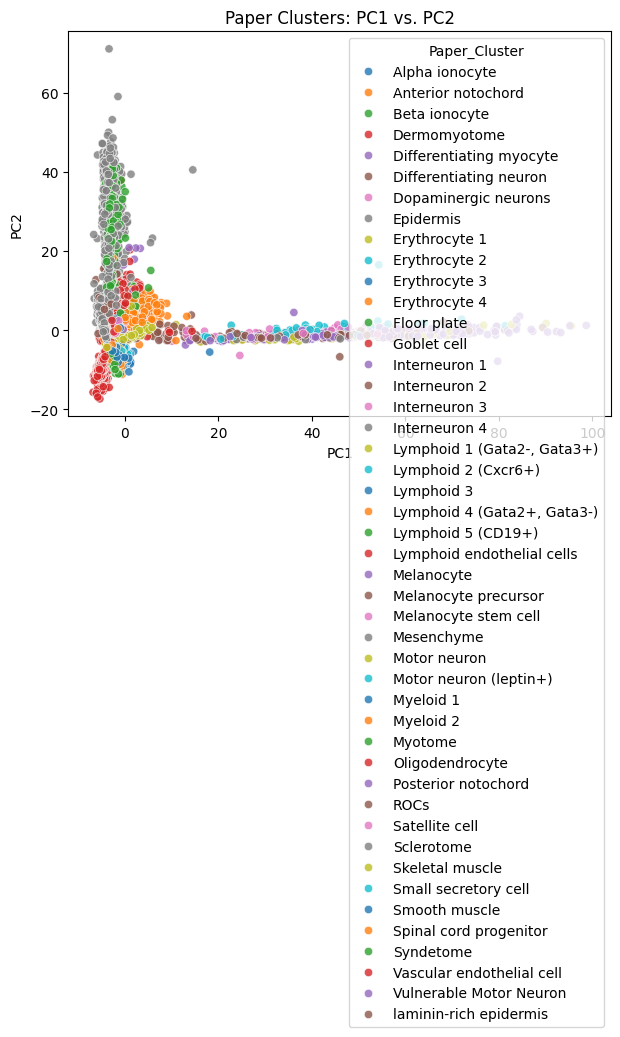

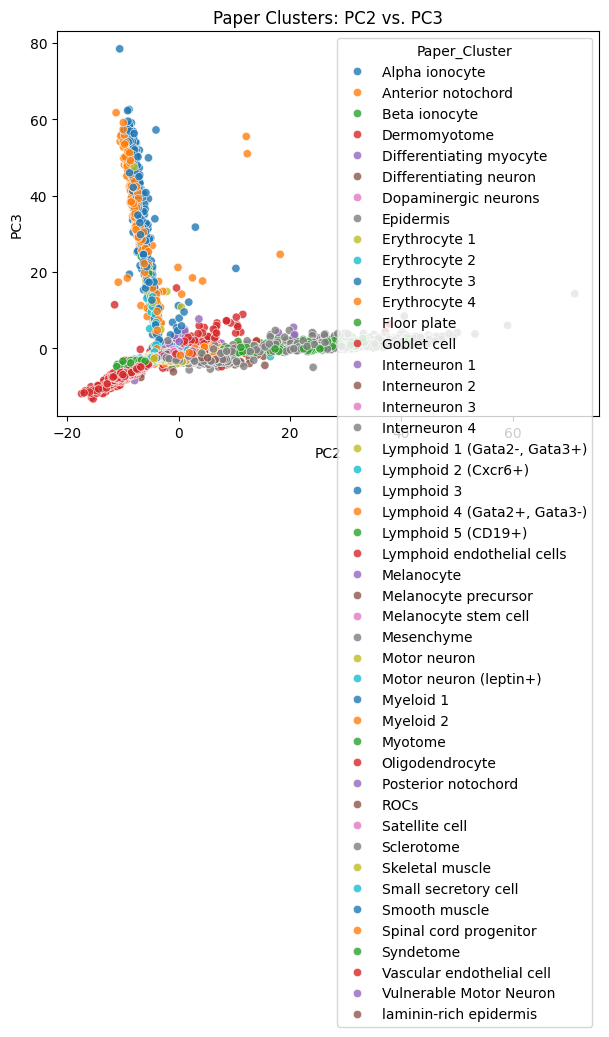

In [44]:
import seaborn as sns
import pandas as pd

pca_df = pd.DataFrame(adata_filtered.obsm["X_pca"][:, :3], columns=["PC1", "PC2", "PC3"])
pca_df["Leiden_Cluster"] = adata_filtered.obs["Leiden_Cluster"].values
pca_df["Paper_Cluster"] = adata_filtered.obs["cluster"].values

#PC1 vs. PC2 (Leiden)
plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Leiden_Cluster", palette="viridis", alpha=0.8)
plt.title("Leiden Clustering: PC1 vs. PC2")
plt.show()

#PC2 vs. PC3 (Leiden)
plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x="PC2", y="PC3", hue="Leiden_Cluster", palette="viridis", alpha=0.8)
plt.title("Leiden Clustering: PC2 vs. PC3")
plt.show()

#PC1 vs. PC2 (Original Clusters from Paper)
plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Paper_Cluster", palette="tab10", alpha=0.8)
plt.title("Paper Clusters: PC1 vs. PC2")
plt.show()

#PC2 vs. PC3 (Original Clusters from Paper)
plt.figure(figsize=(7,5))
sns.scatterplot(data=pca_df, x="PC2", y="PC3", hue="Paper_Cluster", palette="tab10", alpha=0.8)
plt.title("Paper Clusters: PC2 vs. PC3")
plt.show()


In [46]:
import scanpy as sc
import pandas as pd

adata = ad.read_h5ad('/content/drive/MyDrive/Project 1/Frogtail_files/cleaned_processed_frogtail.h5ad')
print("AnnData object:")
print(adata)

print("Metadata columns:")
print(adata.obs.columns)

supp_table = pd.read_csv('/content/drive/MyDrive/Project 1/Frogtail_files/Supplementary_Table3.csv')
print("Preview of Supplementary Table 3:")
print(supp_table.head())

/usr/local/lib/python3.11/dist-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object:
AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'
Metadata columns:
Index(['barcode_cells', 'cell', 'sample', 'DevelopmentalStage',
       'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample',
       'Lane', 'Condition', 'batch'],
      dtype='object')
Preview of Supplementary Table 3:
          wnt5a
0  loc100488523
1  loc100492954
2         egfl6
3         lpar3
4          cpa6


In [47]:
print("Unique clusters:", adata.obs["cluster"].unique())


Unique clusters: ['Erythrocyte 4', 'Myeloid 1', 'Beta ionocyte', 'Goblet cell', 'Erythrocyte 1', ..., 'Smooth muscle', 'Syndetome', 'Differentiating myocyte', 'Oligodendrocyte', 'Lymphoid endothelial cells']
Length: 46
Categories (46, object): ['Alpha ionocyte', 'Anterior notochord', 'Beta ionocyte', 'Dermomyotome', ...,
                          'Syndetome', 'Vascular endothelial cell', 'Vulnerable Motor Neuron',
                          'laminin-rich epidermis']


Skin subset shape: (3937, 31535)


/usr/local/lib/python3.11/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:74: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


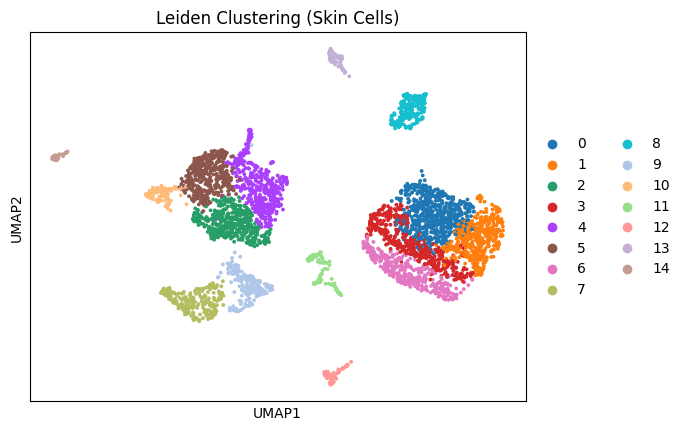

In [49]:
skin_clusters = [
    "Melanocyte precursor",
    "Melanocyte stem cell",
    "Melanocyte",
    "Small secretory cell",
    "Laminin-rich epidermis",
    "Epidermis",
    "Goblet cell",
    "Alpha ionocyte",
    "Beta ionocyte",
    "Regeneration Organizing Cell (ROC)"
]

adata_skin = adata[adata.obs["cluster"].isin(skin_clusters)].copy()
print("Skin subset shape:", adata_skin.shape)

import scanpy as sc
sc.pp.filter_cells(adata_skin, min_genes=200)
sc.pp.filter_genes(adata_skin, min_cells=3)
sc.pp.normalize_total(adata_skin, target_sum=1e4)
sc.pp.log1p(adata_skin)
sc.pp.highly_variable_genes(adata_skin, flavor="seurat_v3", n_top_genes=2000)
adata_skin = adata_skin[:, adata_skin.var["highly_variable"]].copy()
sc.pp.scale(adata_skin)
sc.tl.pca(adata_skin, svd_solver='arpack')

sc.pp.neighbors(adata_skin, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_skin)
sc.tl.leiden(adata_skin, resolution=0.5)
adata_skin.obs["leiden"] = adata_skin.obs["leiden"].astype(str)

sc.pl.umap(adata_skin, color="leiden", title="Leiden Clustering (Skin Cells)")


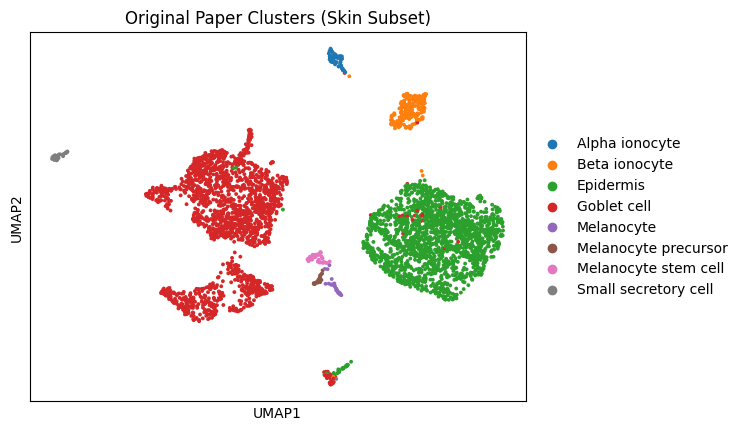

In [50]:
sc.pl.umap(adata_skin, color="cluster", title="Original Paper Clusters (Skin Subset)")


In [51]:
from sklearn.metrics import silhouette_score

X_pca = adata_skin.obsm["X_pca"]

import numpy as np

leiden_labels = adata_skin.obs["leiden"].astype(int)
sil_score_leiden = silhouette_score(X_pca, leiden_labels)
print("Silhouette Score (Leiden):", sil_score_leiden)


Silhouette Score (Leiden): 0.16036631


In [52]:
from sklearn.metrics import adjusted_rand_score

ari_leiden = adjusted_rand_score(adata_skin.obs["cluster"], adata_skin.obs["leiden"])
print("ARI (Leiden vs. Original):", ari_leiden)


ARI (Leiden vs. Original): 0.2523318242226924


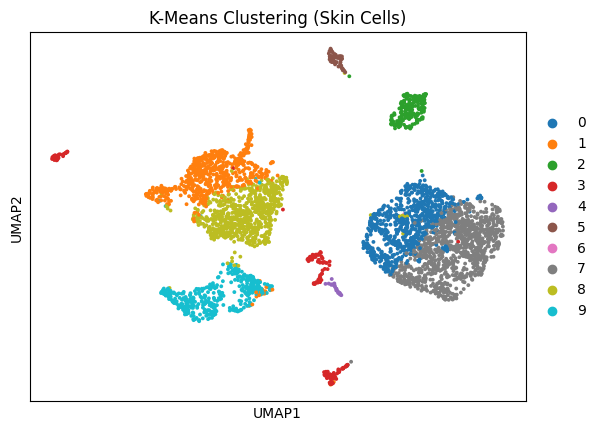

In [53]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)
adata_skin.obs["kmeans"] = kmeans.labels_.astype(str)

sc.pl.umap(adata_skin, color="kmeans", title="K-Means Clustering (Skin Cells)")


In [54]:
sil_score_kmeans = silhouette_score(X_pca, kmeans.labels_)
print("Silhouette Score (K-Means):", sil_score_kmeans)

ari_kmeans = adjusted_rand_score(adata_skin.obs["cluster"], adata_skin.obs["kmeans"])
print("ARI (K-Means vs. Original):", ari_kmeans)


Silhouette Score (K-Means): 0.19777066
ARI (K-Means vs. Original): 0.4566895758490501


## Louvain Clustering

In [62]:
!pip install louvain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00


In [58]:
import scanpy as sc

sc.pp.neighbors(adata_skin, n_neighbors=10, n_pcs=30)

sc.tl.umap(adata_skin)

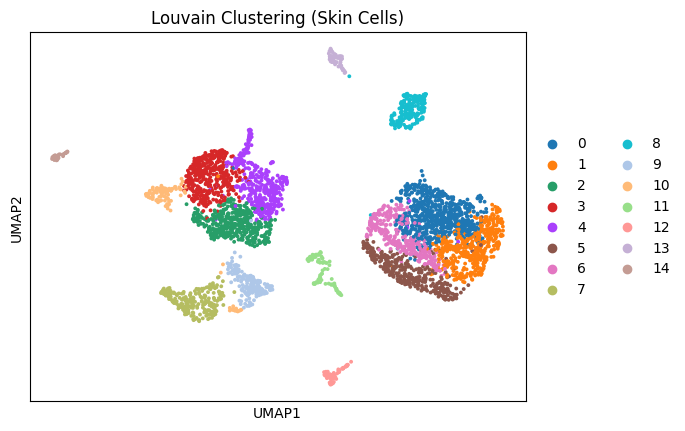

In [63]:
sc.tl.louvain(adata_skin, resolution=0.5)
adata_skin.obs["louvain"] = adata_skin.obs["louvain"].astype(str)
sc.pl.umap(adata_skin, color="louvain", title="Louvain Clustering (Skin Cells)")

In [64]:
from sklearn.metrics import silhouette_score
import numpy as np

X_pca = adata_skin.obsm["X_pca"]

louvain_labels = adata_skin.obs["louvain"].astype(int)

sil_score_louvain = silhouette_score(X_pca, louvain_labels)
print("Silhouette Score (Louvain):", sil_score_louvain)


Silhouette Score (Louvain): 0.1502829


In [65]:
from sklearn.metrics import adjusted_rand_score

ari_louvain = adjusted_rand_score(adata_skin.obs["cluster"], adata_skin.obs["louvain"])
print("ARI (Louvain vs. Original Clusters):", ari_louvain)


ARI (Louvain vs. Original Clusters): 0.2573163055218458


## Optimize Louvain

In [67]:
import scanpy as sc
from sklearn.metrics import silhouette_score, adjusted_rand_score

resolutions = [0.2, 0.4, 0.6, 0.8, 1.0]
X_pca = adata_skin.obsm["X_pca"]
original_clusters = adata_skin.obs["cluster"]

results = []

for res in resolutions:

    sc.tl.louvain(adata_skin, resolution=res, key_added=f"louvain_{res}", random_state=42)

    louvain_labels = adata_skin.obs[f"louvain_{res}"].astype(int)

    sil_score = silhouette_score(X_pca, louvain_labels)

    ari = adjusted_rand_score(original_clusters, adata_skin.obs[f"louvain_{res}"])

    results.append((res, sil_score, ari))

for (res, sil, ari) in results:
    print(f"Resolution: {res}, Silhouette Score: {sil:.3f}, ARI: {ari:.3f}")


Resolution: 0.2, Silhouette Score: 0.355, ARI: 0.803
Resolution: 0.4, Silhouette Score: 0.146, ARI: 0.406
Resolution: 0.6, Silhouette Score: 0.166, ARI: 0.343
Resolution: 0.8, Silhouette Score: 0.145, ARI: 0.234
Resolution: 1.0, Silhouette Score: 0.147, ARI: 0.210


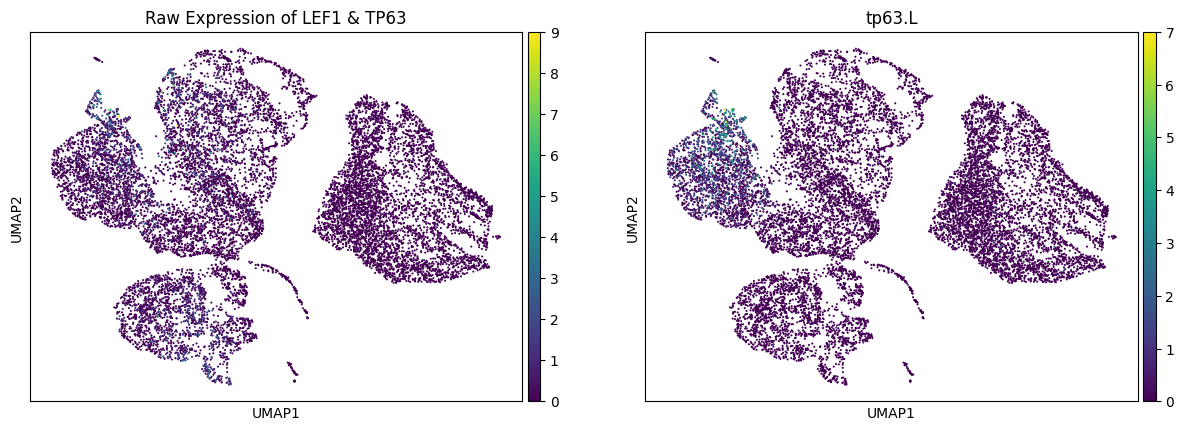

In [75]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["lef1.L", "tp63.L"], title="Raw Expression of LEF1 & TP63")


In [79]:
forced_genes = ["lef1.L", "tp63.L"]
forced_genes_in_data = [g for g in adata_filtered.var_names if g in forced_genes]

hvgs = adata_filtered.var[adata_filtered.var["highly_variable"]].index.tolist()
final_genes = list(set(hvgs + forced_genes_in_data))

adata_filtered = adata_filtered[:, final_genes].copy()


## Identify ROC

In [80]:
sc.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_filtered)


In [82]:
print("lef1.L" in adata.var_names)
print("tp63.L" in adata.var_names)


True
True


In [83]:
print("lef1.L" in adata_filtered.var_names)
print("tp63.L" in adata_filtered.var_names)


False
False


In [84]:
forced_genes = ["lef1.L", "tp63.L"]
forced_genes_in_data = [g for g in adata.var_names if g in forced_genes]  # use adata.var_names from raw data

hvgs = adata_filtered.var[adata_filtered.var["highly_variable"]].index.tolist()

final_genes = list(set(hvgs + forced_genes_in_data))

adata_filtered = adata[:, final_genes].copy()


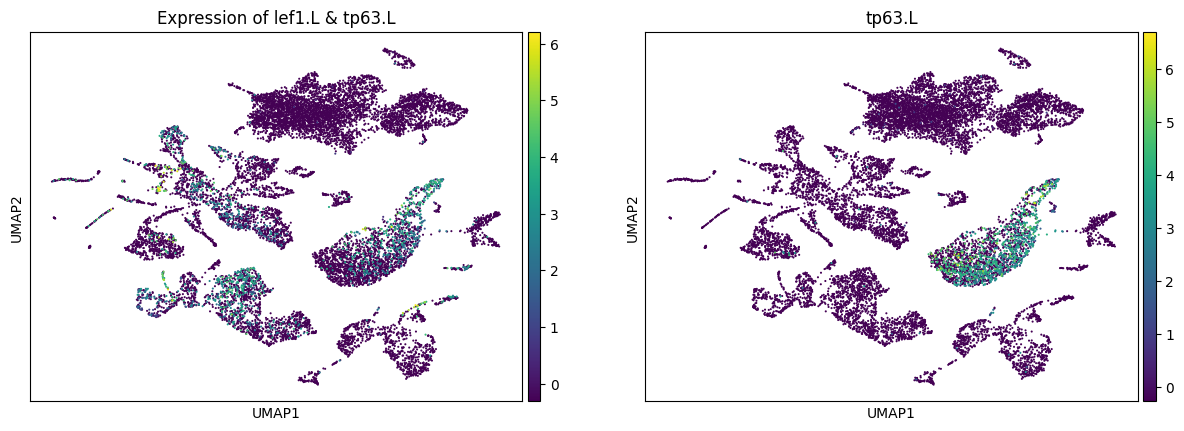

In [85]:
sc.pp.normalize_total(adata_filtered, target_sum=1e4)
sc.pp.log1p(adata_filtered)
sc.pp.scale(adata_filtered)
sc.tl.pca(adata_filtered, svd_solver='arpack')
sc.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_filtered)
sc.pl.umap(adata_filtered, color=["lef1.L", "tp63.L"], title="Expression of lef1.L & tp63.L")


Index(['barcode_cells', 'cell', 'sample', 'DevelopmentalStage',
       'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample',
       'Lane', 'Condition', 'batch', 'louvain_0.2'],
      dtype='object')


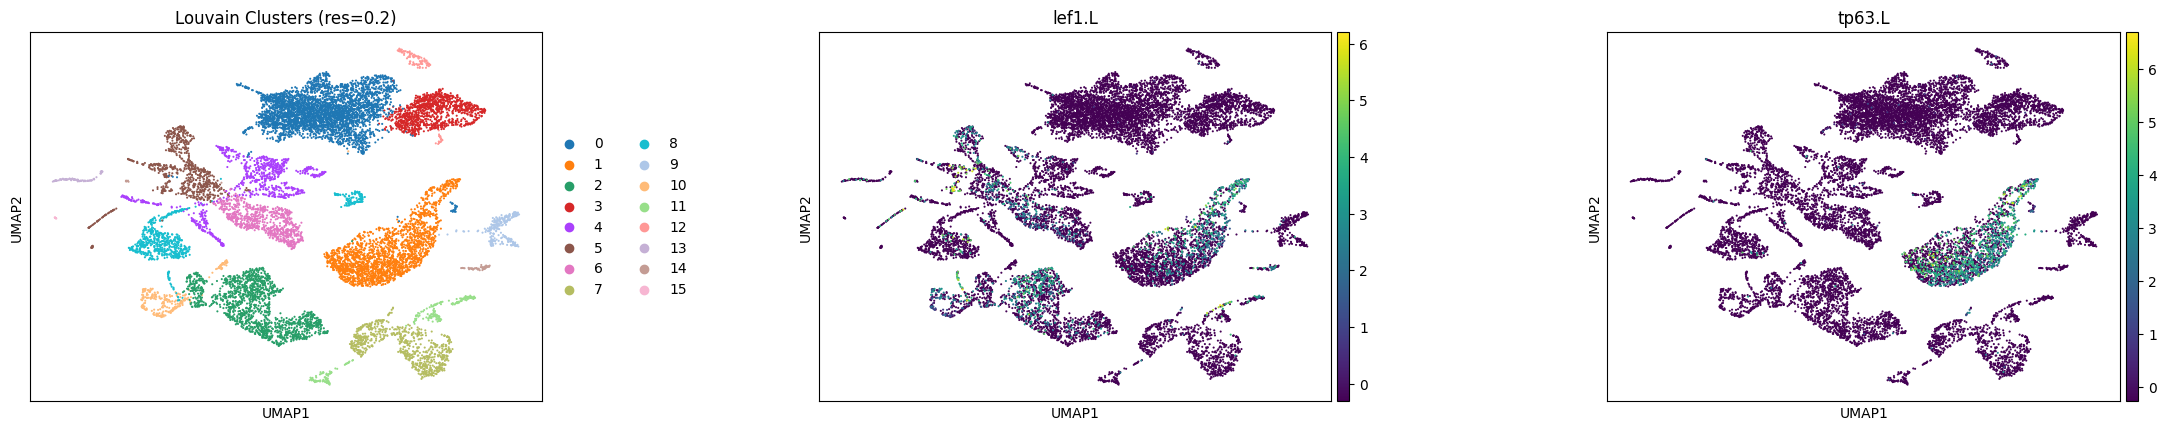

In [87]:
sc.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=30)

sc.tl.louvain(adata_filtered, resolution=0.2, key_added="louvain_0.2")
print(adata_filtered.obs.columns)
sc.pl.umap(
    adata_filtered,
    color=["louvain_0.2", "lef1.L", "tp63.L"],
    wspace=0.4,
    title=["Louvain Clusters (res=0.2)", "lef1.L", "tp63.L"]
)


/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


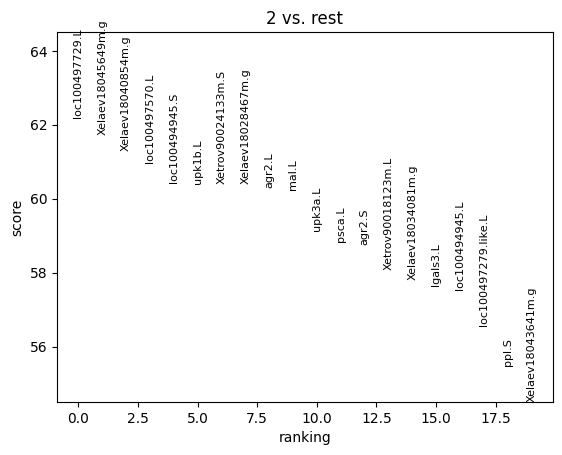

In [88]:
import scanpy as sc

sc.tl.rank_genes_groups(
    adata_filtered,
    groupby="louvain_0.2",
    groups=["2"],
    reference="rest",
    method="wilcoxon"
)
sc.pl.rank_genes_groups(adata_filtered, n_genes=20, sharey=False, title="ROC Marker Genes (Wilcoxon)")


In [90]:
import scanpy as sc

sc.tl.rank_genes_groups(
    adata_filtered,
    groupby="louvain_0.2",
    reference="rest",
    method="logreg"
)
top_genes_cluster2 = adata_filtered.uns['rank_genes_groups']['names']['2']
print("Top genes for cluster 2:", top_genes_cluster2)


Top genes for cluster 2: ['mal.L' 'loc101735282.L' 'aldh1a1.S' ... 'Xetrov90011361m.L'
 'Xelaev18022529m.g' 'Xelaev18022528m.g']


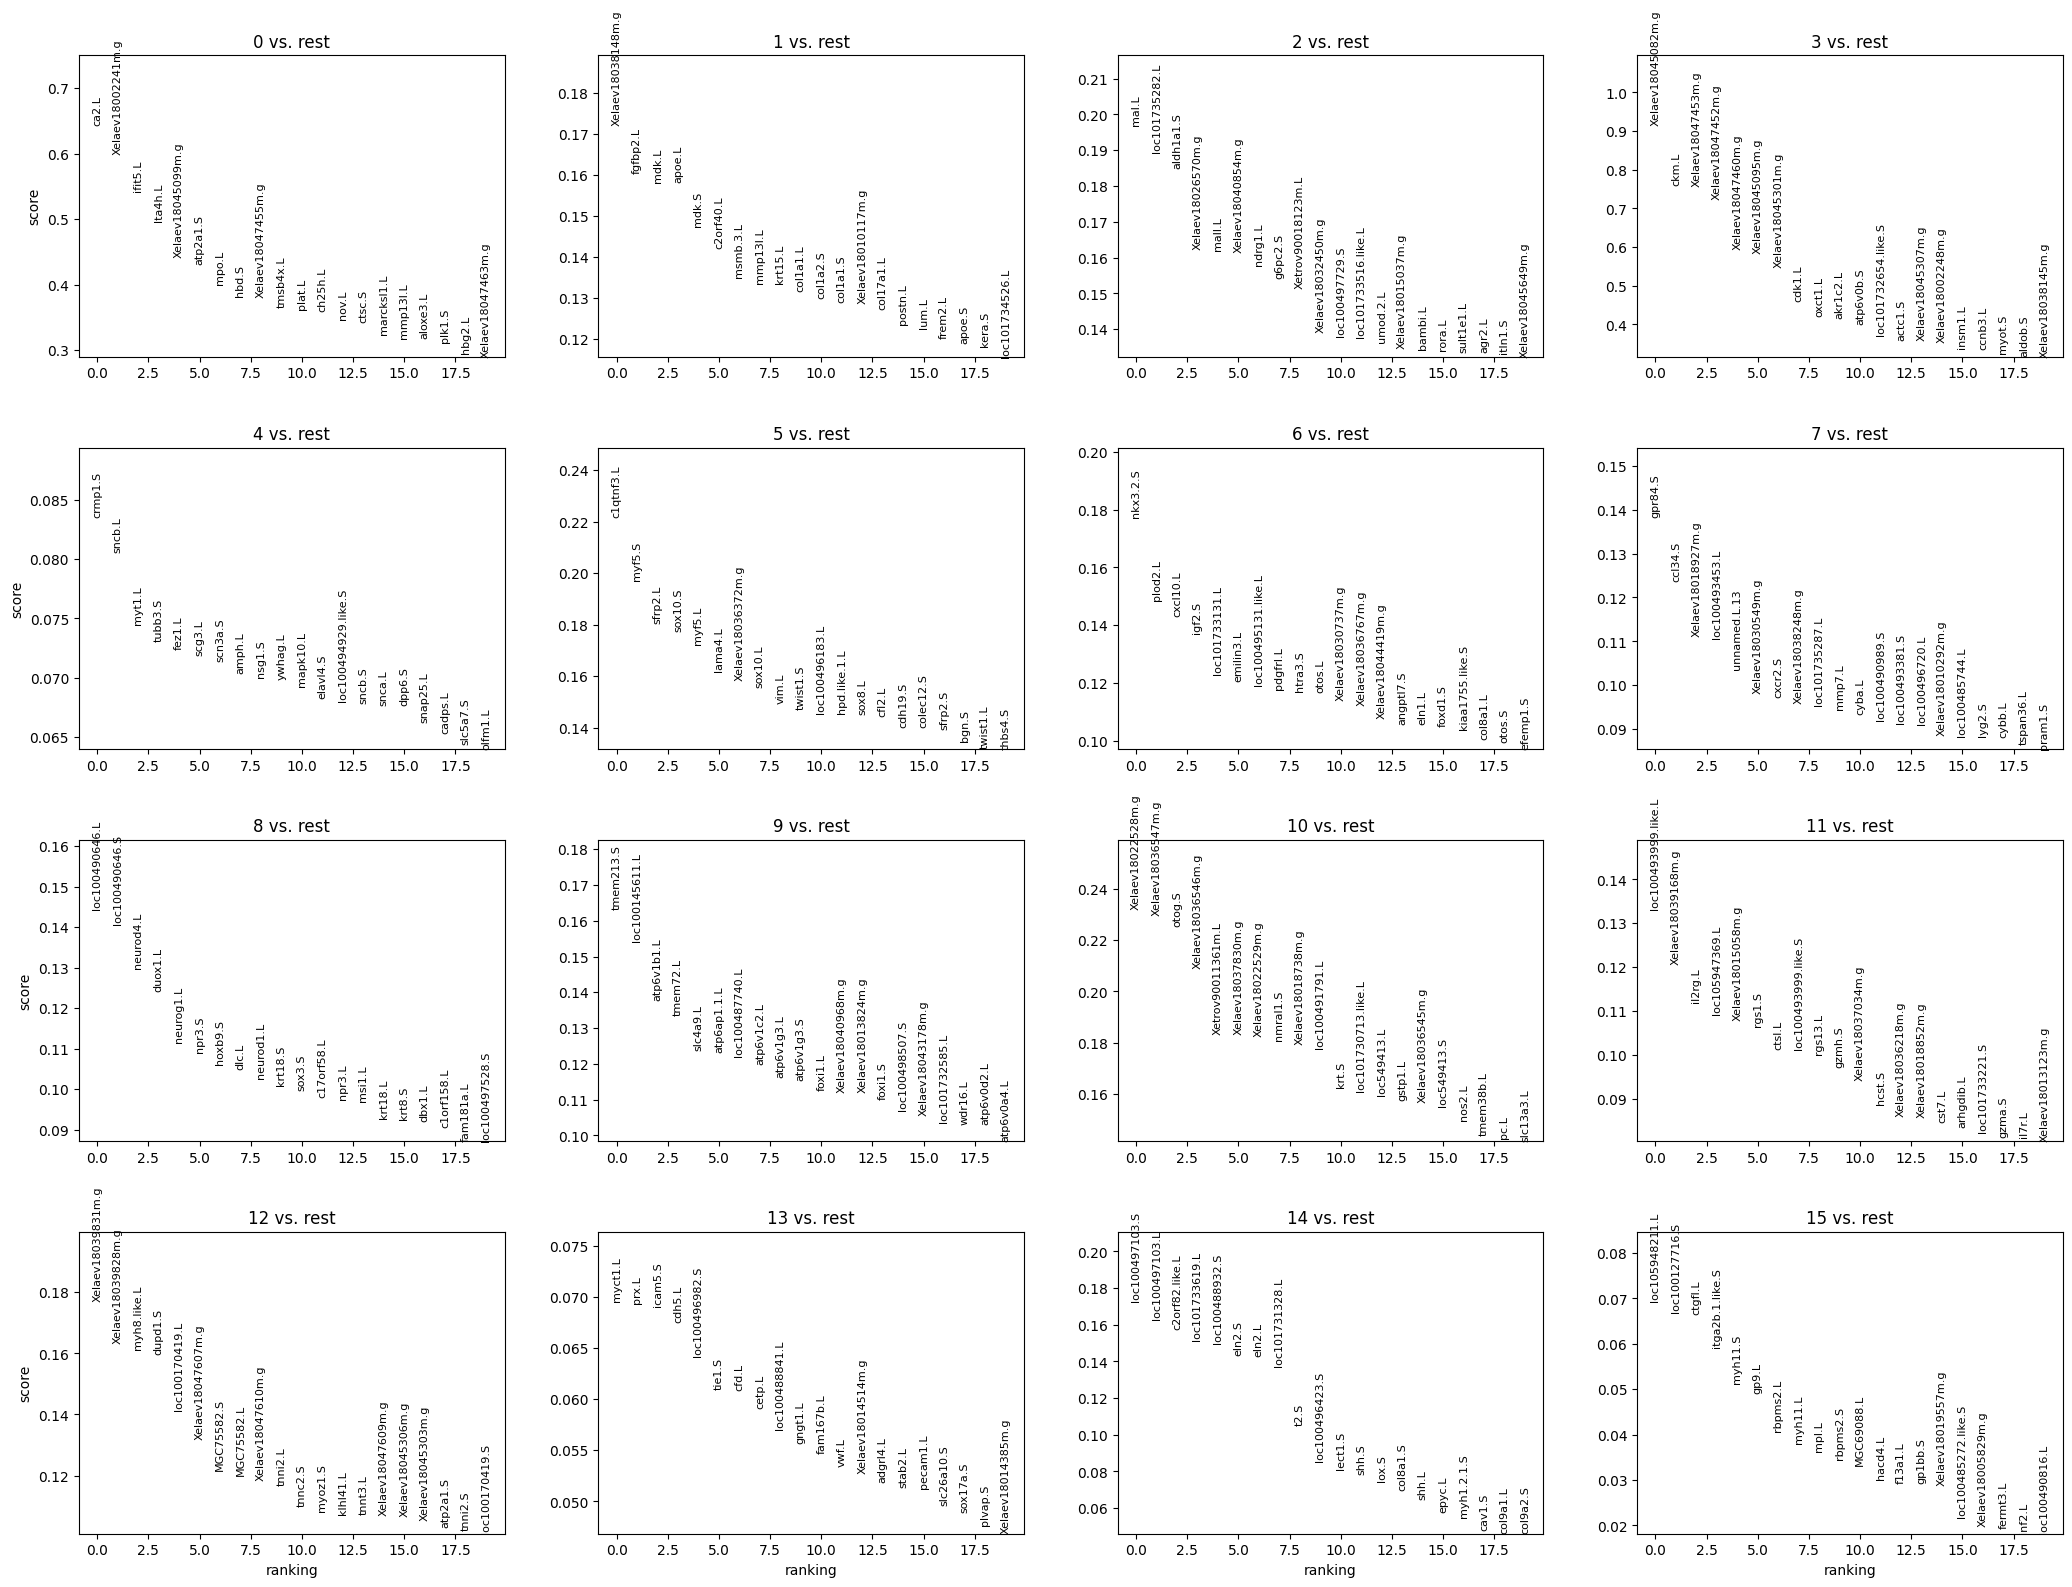

In [92]:
sc.pl.rank_genes_groups(adata_filtered, n_genes=20, sharey=False)


In [95]:
roc_cluster = "2"
roc_markers = adata_filtered.uns["rank_genes_groups"]["names"][roc_cluster]
roc_scores = adata_filtered.uns["rank_genes_groups"]["scores"][roc_cluster]

for gene, score in zip(roc_markers[:20], roc_scores[:20]):
    print(f"{gene}\t{score}")


mal.L	0.19704018533229828
loc101735282.L	0.18935799598693848
aldh1a1.S	0.1850588172674179
Xelaev18026570m.g	0.16217957437038422
mall.L	0.16192716360092163
Xelaev18040854m.g	0.16144925355911255
ndrg1.L	0.15772400796413422
g6pc2.S	0.1542590707540512
Xetrov90018123m.L	0.15154024958610535
Xelaev18032450m.g	0.13917313516139984
loc100497729.S	0.1380276083946228
loc101733516.like.L	0.13780593872070312
umod.2.L	0.1363665908575058
Xelaev18015037m.g	0.13467131555080414
bambi.L	0.13443271815776825
rora.L	0.13416889309883118
sult1e1.L	0.1336299031972885
agr2.L	0.1335778385400772
itln1.S	0.13326981663703918
Xelaev18045649m.g	0.13221673667430878


In [97]:
common_genes_partial = []
for marker_gene in roc_markers:
    stripped_marker = marker_gene.split('.')[0].lower()
    for sg in supp_genes:
        stripped_sg = sg.split('.')[0].lower()

        if stripped_marker == stripped_sg:
            common_genes_partial.append((marker_gene, sg))

print("Potential partial matches:", common_genes_partial)


Potential partial matches: [('tspear.L', 'tspear'), ('Xelaev18043128m.g', 'Xelaev18043128m'), ('fgf7.L', 'fgf7'), ('cpa6.L', 'cpa6'), ('fgf7.S', 'fgf7'), ('lef1.L', 'lef1'), ('sp9.L', 'sp9'), ('nid2.L', 'nid2'), ('bmp5.L', 'bmp5'), ('rspo2.L', 'rspo2'), ('pltp.S', 'pltp'), ('vwde.L', 'vwde'), ('loc100492954.S', 'loc100492954'), ('robo4.S', 'robo4'), ('pzp.L', 'pzp'), ('lpar3.L', 'lpar3'), ('cpa6.S', 'cpa6'), ('frem2.1.L', 'frem2'), ('jchain.L', 'jchain'), ('egfl6.L', 'egfl6'), ('igfbp2.S', 'igfbp2'), ('egfl6.S', 'egfl6'), ('krt.L', 'krt'), ('krt.S', 'krt'), ('frem2.L', 'frem2')]


In [99]:
print([gene for gene in adata.var_names if "wnt5a" in gene.lower()])


['wnt5a.L', 'wnt5a.S']


In [101]:
print("wnt5a.L" in adata.var_names)
print("wnt5a.S" in adata.var_names)


True
True


In [105]:
sc.pp.highly_variable_genes(adata_filtered, flavor="cell_ranger", n_top_genes=2000)


In [106]:
forced_genes = ["wnt5a.L", "wnt5a.S"]

forced_genes_in_data = [g for g in adata.var_names if g in forced_genes]
print("Forced genes found in raw data:", forced_genes_in_data)

hvgs = adata_filtered.var[adata_filtered.var["highly_variable"]].index.tolist()

final_genes = list(set(hvgs + forced_genes_in_data))

adata_filtered = adata[:, final_genes].copy()


Forced genes found in raw data: ['wnt5a.L', 'wnt5a.S']


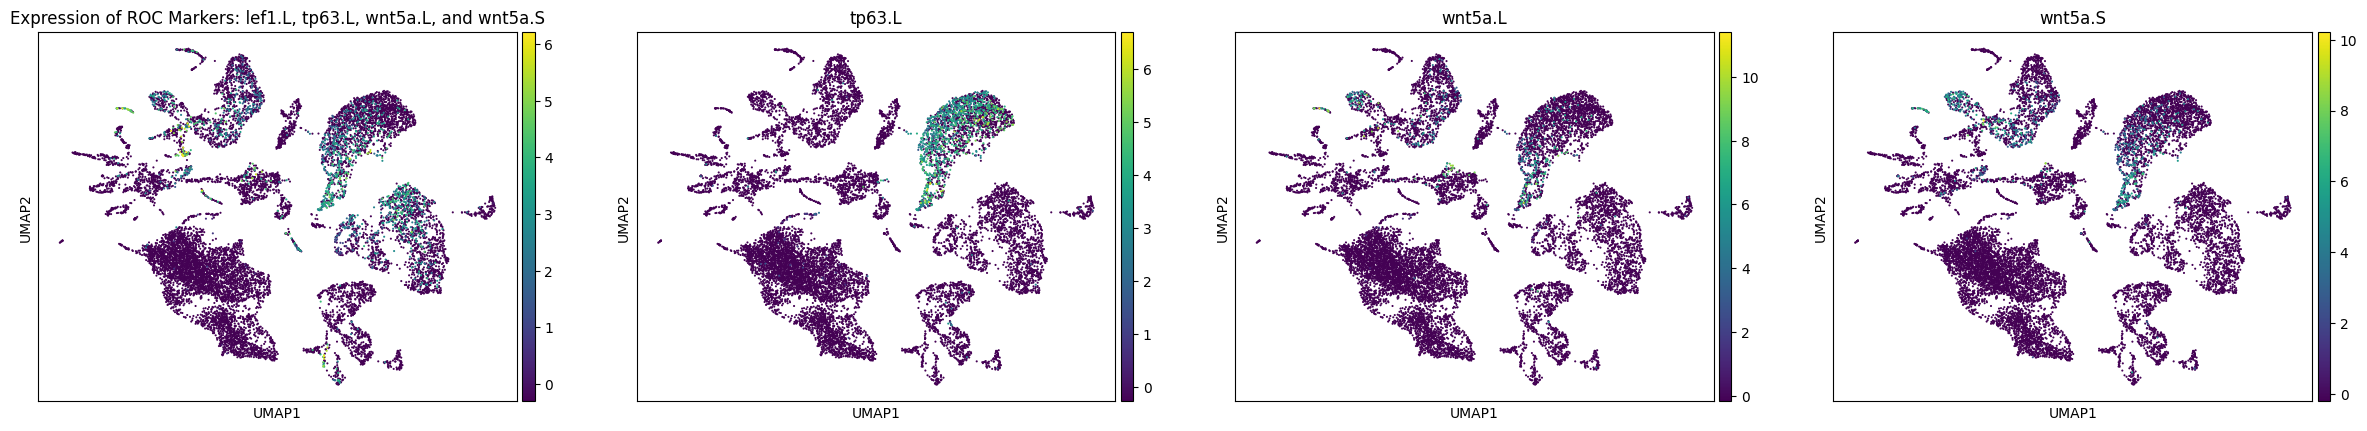

In [107]:
import scanpy as sc

sc.pp.normalize_total(adata_filtered, target_sum=1e4)

sc.pp.log1p(adata_filtered)

sc.pp.scale(adata_filtered)

sc.tl.pca(adata_filtered, svd_solver='arpack')

sc.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=30)

sc.tl.umap(adata_filtered)

sc.pl.umap(adata_filtered, color=["lef1.L", "tp63.L", "wnt5a.L", "wnt5a.S"],
           title="Expression of ROC Markers: lef1.L, tp63.L, wnt5a.L, and wnt5a.S")


In [110]:
sc.pp.neighbors(adata_filtered, n_neighbors=10, n_pcs=30)


In [111]:
sc.tl.louvain(adata_filtered, resolution=0.2, key_added="louvain_0.2", random_state=42)


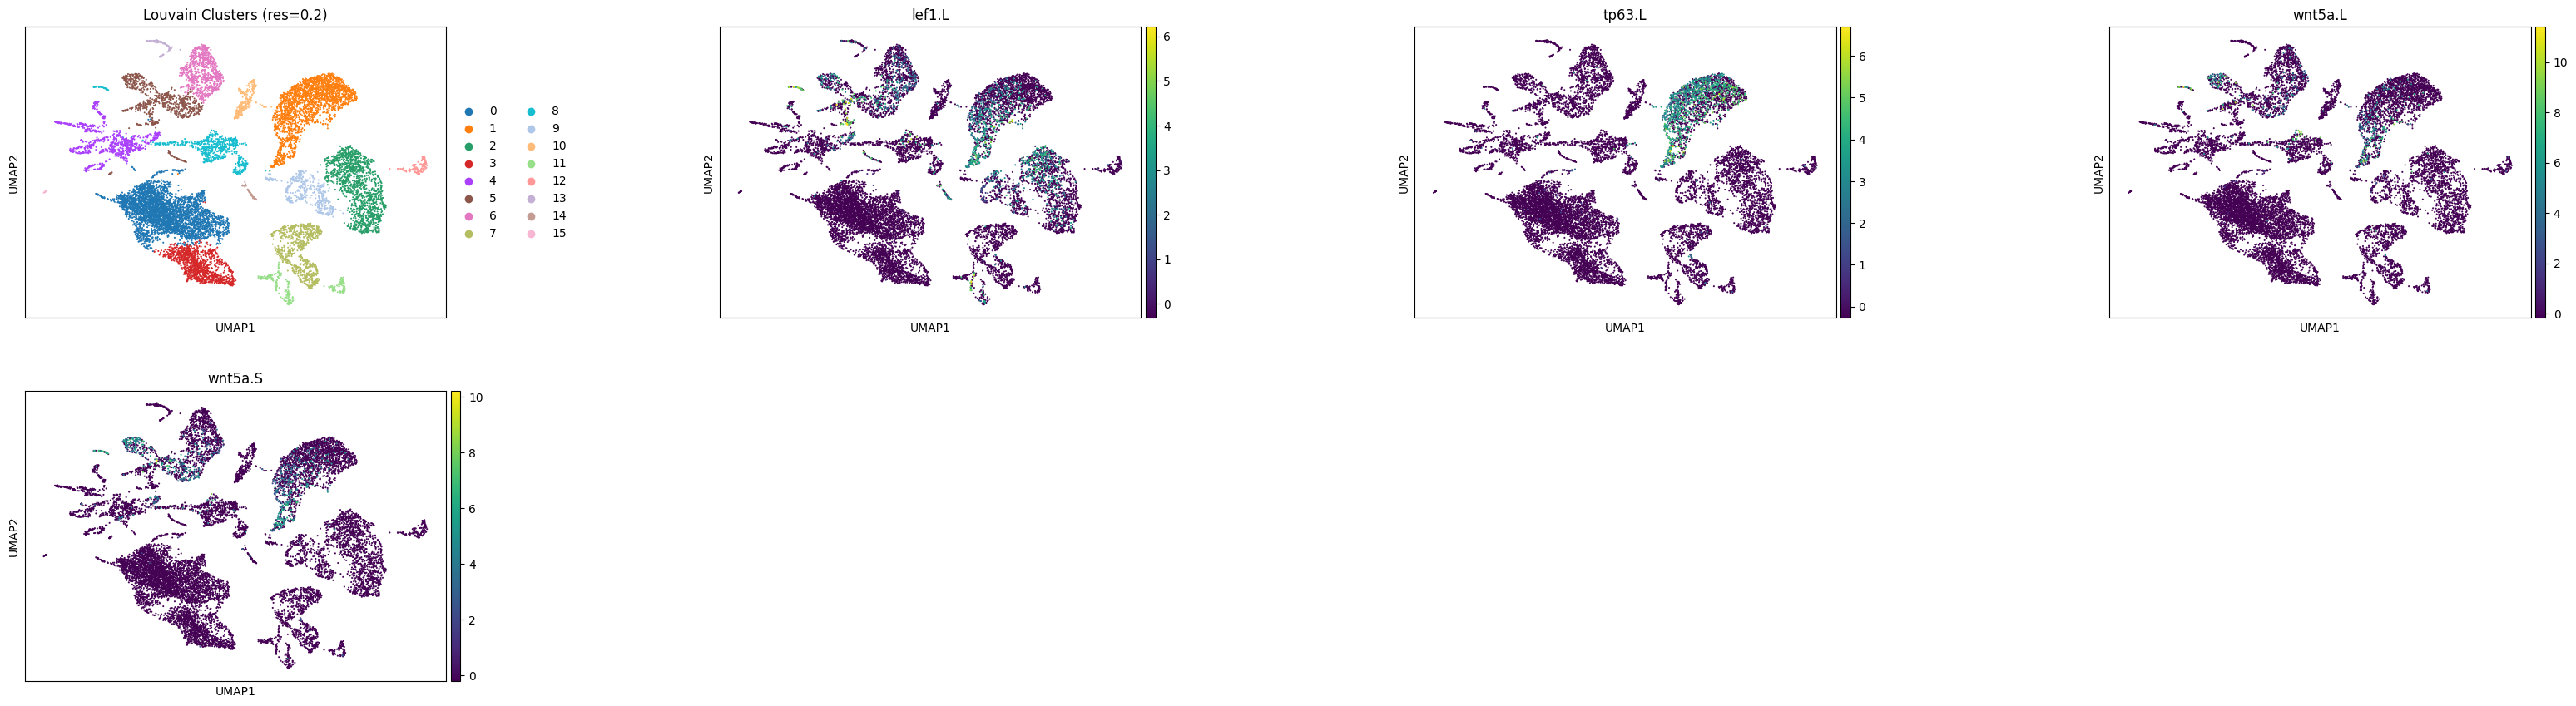

In [112]:
sc.pl.umap(
    adata_filtered,
    color=["louvain_0.2", "lef1.L", "tp63.L", "wnt5a.L", "wnt5a.S"],
    wspace=0.5,
    title=["Louvain Clusters (res=0.2)", "lef1.L", "tp63.L", "wnt5a.L", "wnt5a.S"]
)


/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.11/dist-packages/scanpy/tools/_rank_genes_groups.py:461: 

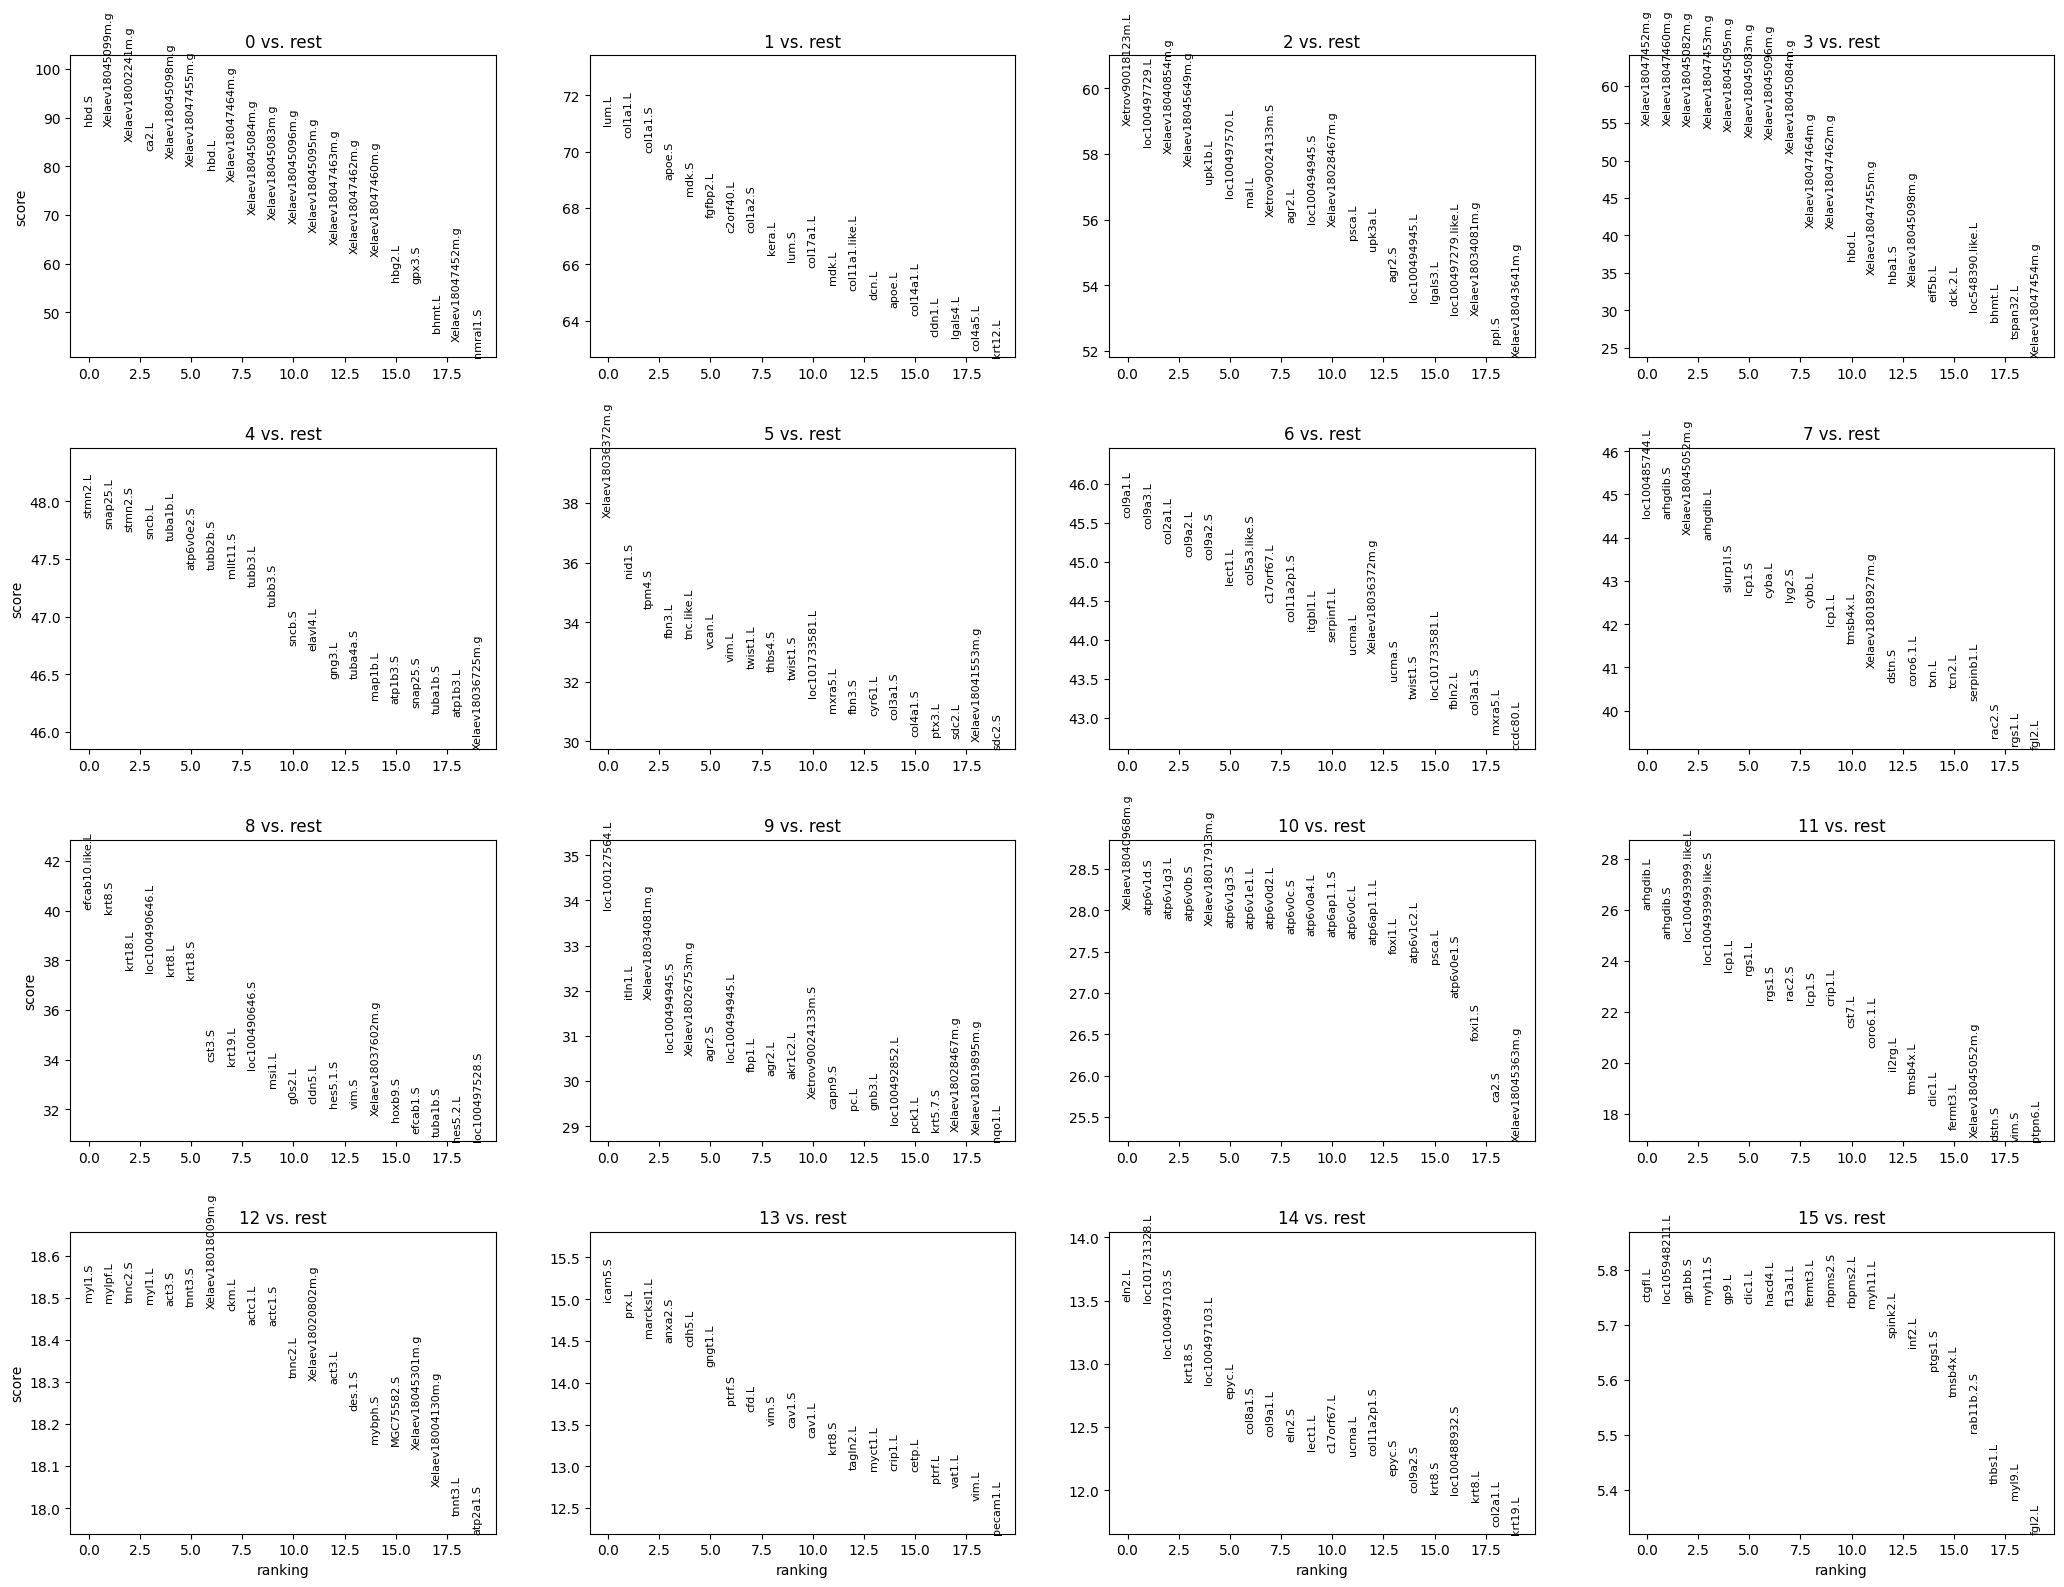

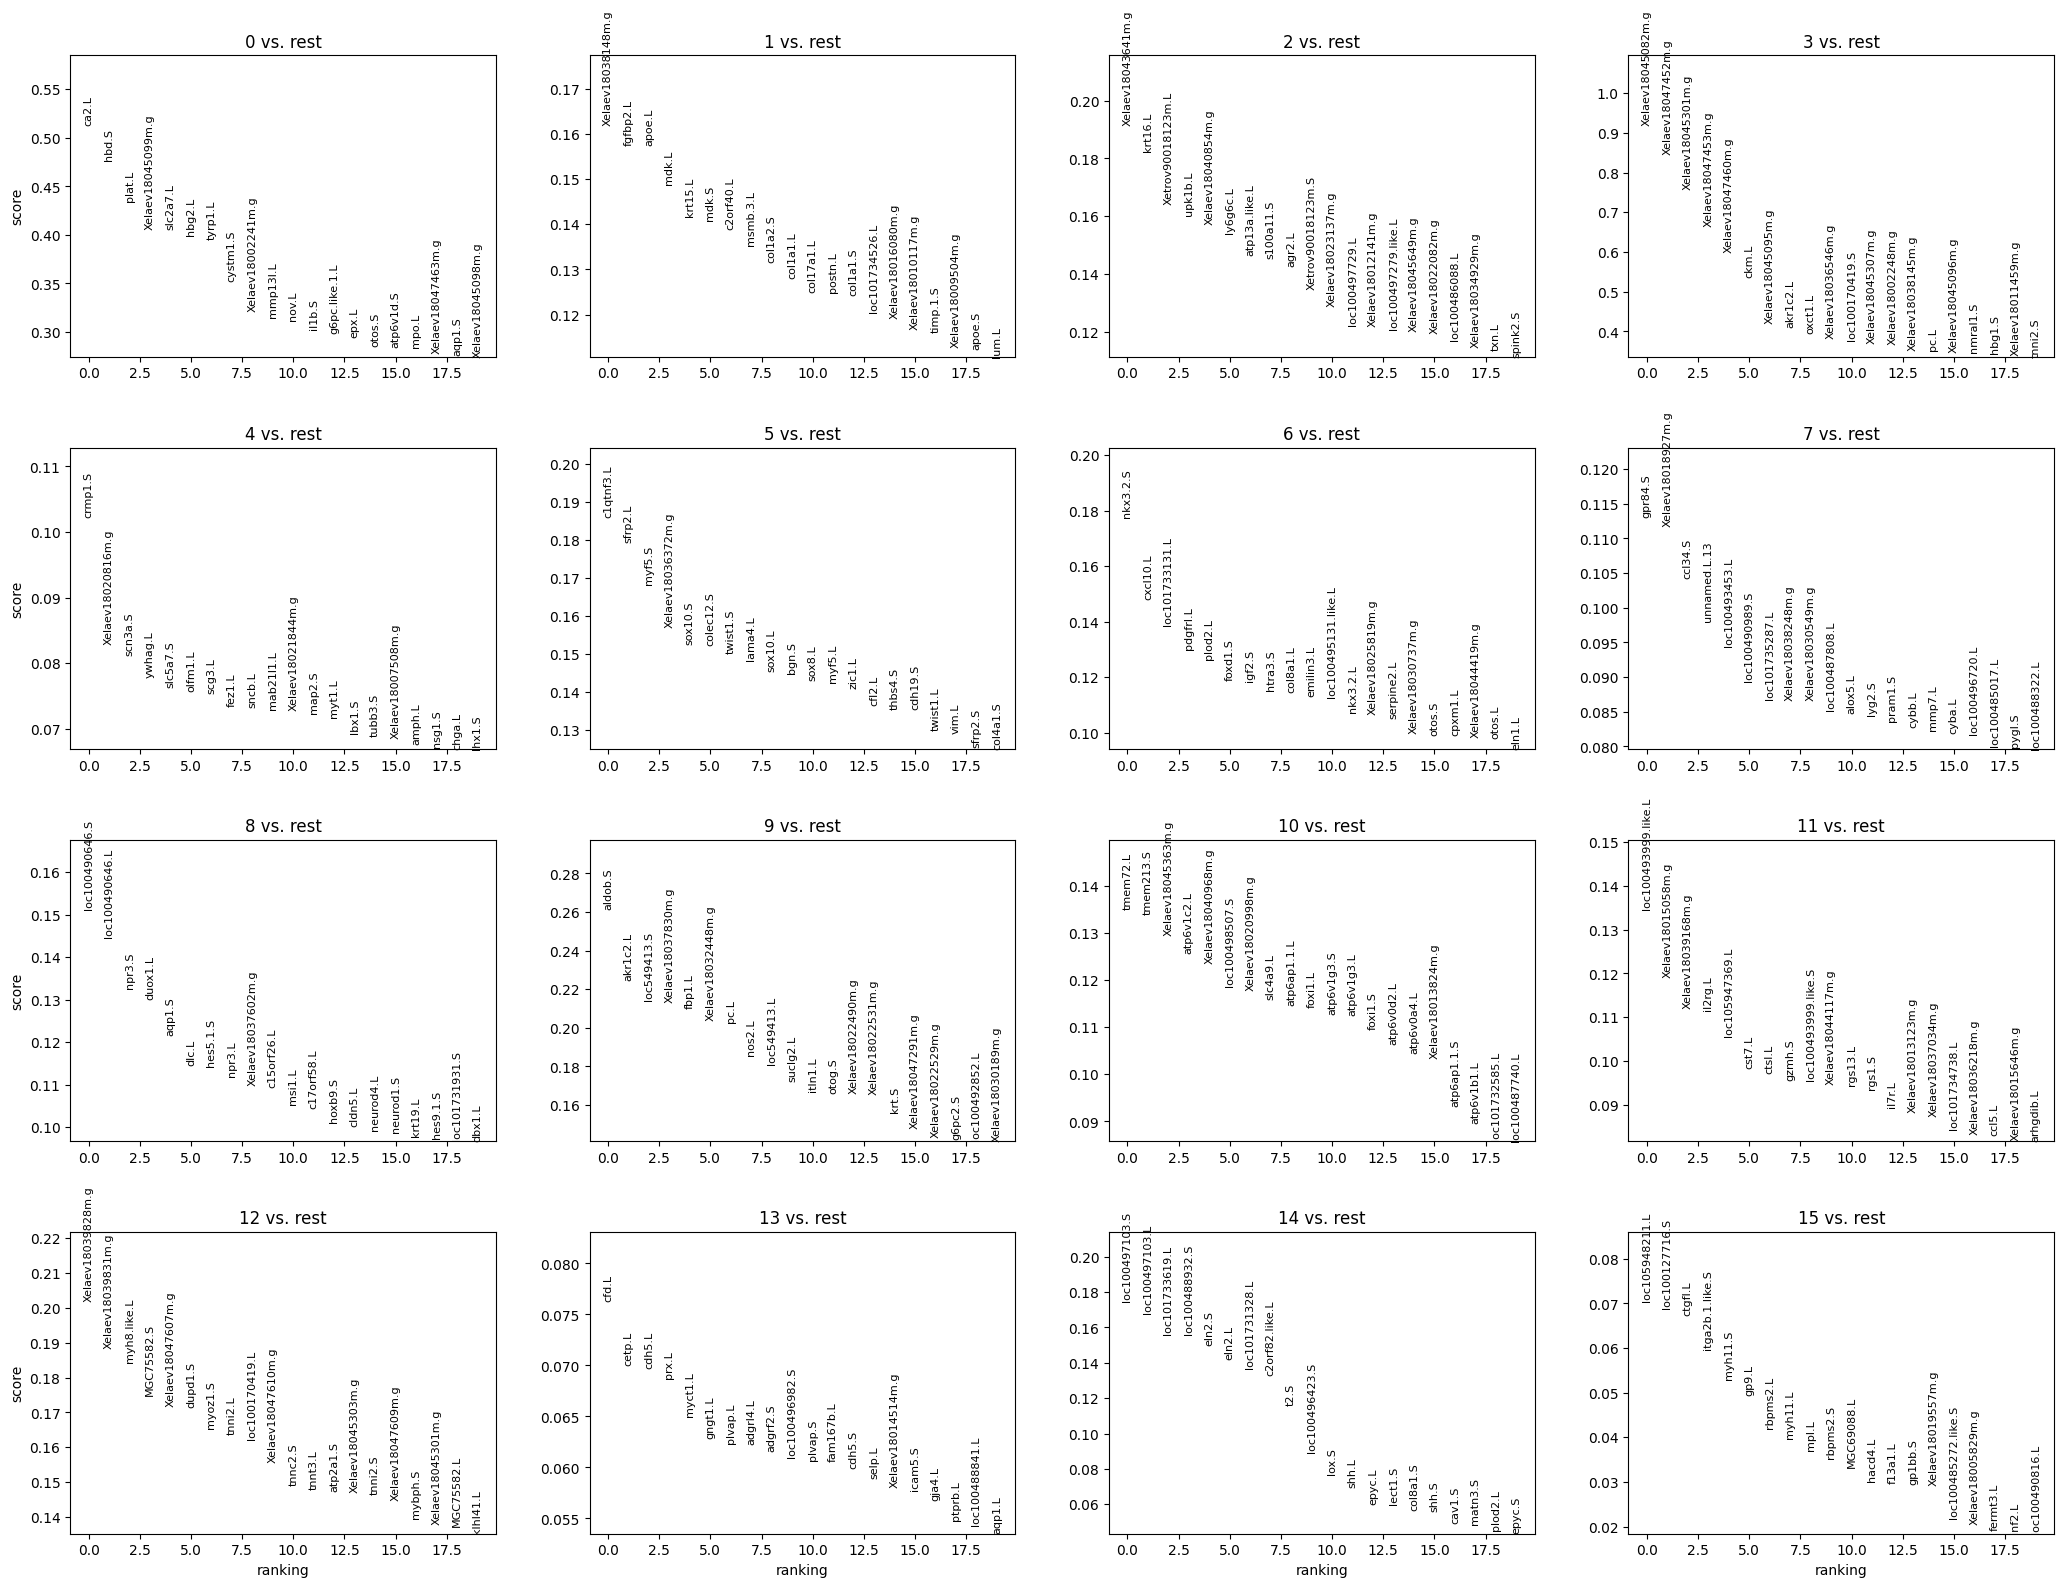

In [113]:
sc.tl.rank_genes_groups(adata_filtered, groupby="louvain_0.2", method="wilcoxon", reference="rest")
sc.pl.rank_genes_groups(adata_filtered, n_genes=20, sharey=False, title="Top Marker Genes (Wilcoxon)")
sc.tl.rank_genes_groups(adata_filtered, groupby="louvain_0.2", method="logreg", reference="rest")
sc.pl.rank_genes_groups(adata_filtered, n_genes=20, sharey=False, title="Top Marker Genes (LogReg)")

In [115]:
def strip_allele_suffix(gene_name):
    """
    Splits the gene name by '.' and returns the part before the suffix.
    For example, 'lef1.L' -> 'lef1', 'wnt5a.S' -> 'wnt5a'
    """
    return gene_name.split('.')[0].lower()

roc_markers = adata_filtered.uns["rank_genes_groups"]["names"]["2"]
roc_markers_stripped = {strip_allele_suffix(g) for g in roc_markers}

supp_genes_stripped = {sg.lower() for sg in supp_genes}

common_stripped = roc_markers_stripped.intersection(supp_genes_stripped)
print("Base-name overlaps:", common_stripped)


Base-name overlaps: {'jchain', 'tspear', 'frem2', 'fgf7', 'krt', 'egfl6', 'igfbp2', 'robo4', 'xelaev18043128m', 'rspo2', 'lef1', 'lpar3', 'sp9', 'bmp5', 'nid2', 'pzp', 'cpa6', 'vwde', 'loc100492954', 'wnt5a', 'pltp'}


In [116]:
{'jchain', 'tspear', 'frem2', 'fgf7', 'krt', 'egfl6', 'igfbp2', 'robo4',
 'xelaev18043128m', 'rspo2', 'lef1', 'lpar3', 'sp9', 'bmp5', 'nid2',
 'pzp', 'cpa6', 'vwde', 'loc100492954', 'wnt5a', 'pltp'}


{'bmp5',
 'cpa6',
 'egfl6',
 'fgf7',
 'frem2',
 'igfbp2',
 'jchain',
 'krt',
 'lef1',
 'loc100492954',
 'lpar3',
 'nid2',
 'pltp',
 'pzp',
 'robo4',
 'rspo2',
 'sp9',
 'tspear',
 'vwde',
 'wnt5a',
 'xelaev18043128m'}

In [117]:
!pip install gseapy
import gseapy as gp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.2/549.2 kB 26.0 MB/s eta 0:00:00


In [118]:
def strip_allele_suffix(gene_name):
    """Return the gene name without the allele suffix."""
    return gene_name.split('.')[0].lower()

roc_markers = adata_filtered.uns["rank_genes_groups"]["names"]["2"]
roc_markers_stripped = {strip_allele_suffix(g) for g in roc_markers}

roc_markers_list = list(roc_markers_stripped)
print("Number of ROC marker genes (base names):", len(roc_markers_list))
print("Example ROC markers:", roc_markers_list[:10])


Number of ROC marker genes (base names): 1626
Example ROC markers: ['azin2', 'fam167b', 'crhbp', 'loc100137672', 'xelaev18027962m', 'aqp1', 'rtn1', 'xelaev18040453m', 'mgc75582', 'krt15']


In [119]:

enr = gp.enrichr(gene_list=roc_markers_list,
                 gene_sets=['GO_Biological_Process_2021'],
                 organism='Human',
                 outdir='enrichr_results',
                 cutoff=0.5)

print(enr.results.head())


                     Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   

                                                Term Overlap       P-value  \
0     extracellular matrix organization (GO:0030198)  85/300  2.368097e-25   
1  extracellular structure organization (GO:0043062)  67/216  1.208211e-22   
2  external encapsulating structure organization ...  67/217  1.612657e-22   
3          collagen fibril organization (GO:0030199)   30/89  6.131430e-12   
4                epithelium development (GO:0060429)  33/122  4.269483e-10   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      9.434500e-22            0                     0    4.658754   
1      2.141608e-19            0                     0    5.256661   
2      2.141608e-19            0                     0    5.221330   
3      6.106905e-09            0                    

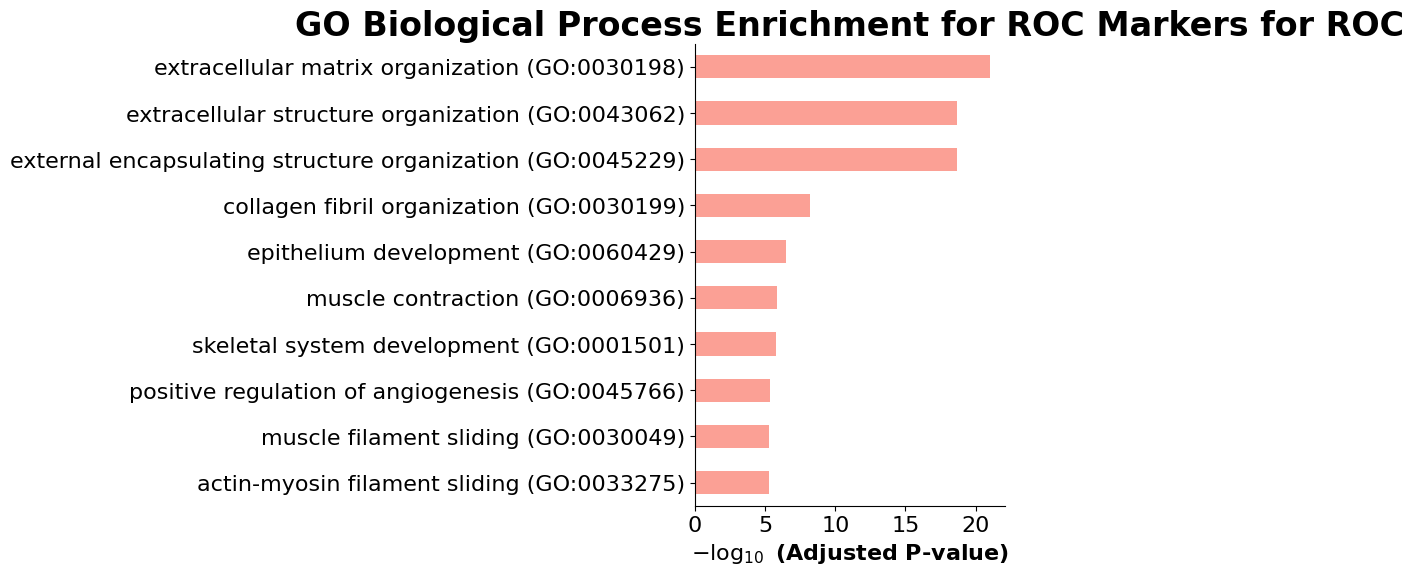

In [122]:
import matplotlib.pyplot as plt
fig = gp.barplot(enr.results, title='GO Biological Process Enrichment for ROC Markers for ROC', ofname=None)
plt.show()


In [143]:
import scanpy as sc

skin_clusters = [
    "laminin-rich epidermis",
    "Epidermis",
    "Goblet cell",
    "Small secretory cell",
    "Alpha ionocyte",
    "Beta ionocyte",
    "Melanocyte",
    "Melanocyte precursor",
    "Melanocyte stem cell"
]

adata_skin = adata[adata.obs["cluster"].isin(skin_clusters)].copy()
print("adata_skin shape:", adata_skin.shape)


adata_skin shape: (3958, 31535)


In [144]:
sc.pp.filter_cells(adata_skin, min_genes=200)
sc.pp.filter_genes(adata_skin, min_cells=3)
sc.pp.normalize_total(adata_skin, target_sum=1e4)
sc.pp.log1p(adata_skin)
sc.pp.highly_variable_genes(adata_skin, flavor="cell_ranger", n_top_genes=2000)
adata_skin = adata_skin[:, adata_skin.var["highly_variable"]].copy()
sc.pp.scale(adata_skin)
sc.tl.pca(adata_skin, svd_solver='arpack')
sc.pp.neighbors(adata_skin, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata_skin)


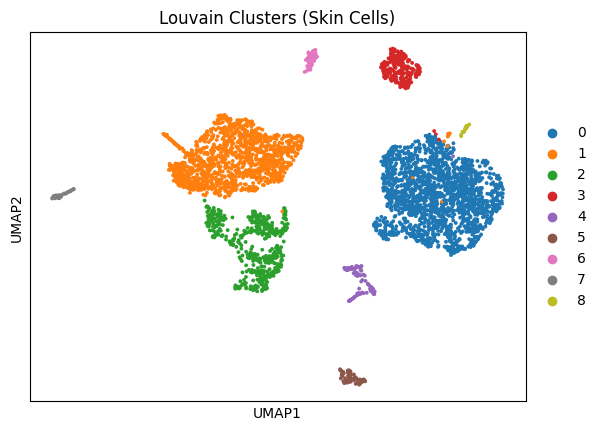

In [145]:
sc.tl.louvain(adata_skin, resolution=0.2, key_added="louvain", random_state=42)
sc.pl.umap(adata_skin, color="louvain", title="Louvain Clusters (Skin Cells)")

<ipython-input-148-23cb7d6fcf72>:17: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata_skin.obs["louvain_named"] = adata_skin.obs["louvain"].replace(cluster_mapping)


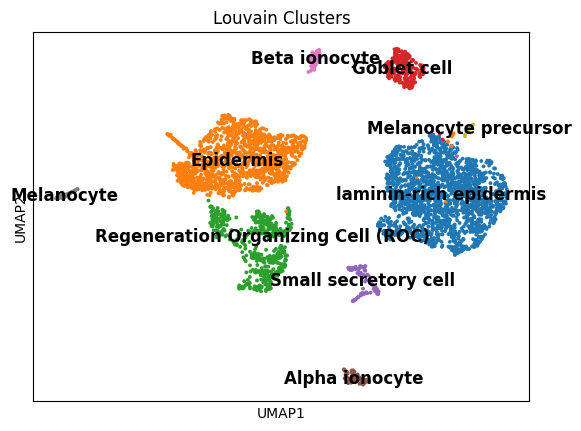

In [148]:
cluster_mapping = {
    "0": "laminin-rich epidermis",
    "1": "Epidermis",
    "2": "Regeneration Organizing Cell (ROC)",
    "3": "Goblet cell",
    "4": "Small secretory cell",
    "5": "Alpha ionocyte",
    "6": "Beta ionocyte",
    "7": "Melanocyte",
    "8": "Melanocyte precursor",
    "9": "Melanocyte stem cell"
}

adata_skin.obs["louvain_named"] = adata_skin.obs["louvain"].replace(cluster_mapping)

adata_skin.obs["louvain_named"] = adata_skin.obs["louvain_named"].astype("category")
sc.pl.umap(
    adata_skin,
    color="louvain_named",
    title="Louvain Clusters",
    legend_loc="on data",
    legend_fontsize=12
)